\:5e73\:8861\:70b9: {{X -> 0., Y -> -10.}, {X -> 1., Y -> 0.}, 
 
>    {X -> 0.0554004, Y -> 0.498465}, {X -> 0., Y -> 0.}}
\:7279\:5f81\:503c: {{{X -> 0., Y -> -10.}, {21., 0.1}}, 
 
>    {{X -> 1., Y -> 0.}, {-1., 0.9}}, 
 
>    {{X -> 0.0554004, Y -> 0.498465}, 
 
>     {-0.00540042 + 0.306533 I, -0.00540042 - 0.306533 I}}, 
 
>    {{X -> 0., Y -> 0.}, {1., -0.1}}}


{{X -> 0., Y -> -10.}, {X -> 1., Y -> 0.}, {X -> 0.0554004, Y -> 0.498465}, 
 
>   {X -> 0., Y -> 0.}}
{{{X -> 0., Y -> -10.}, {21., 0.1}}, {{X -> 1., Y -> 0.}, {-1., 0.9}}, 
 
>   {{X -> 0.0554004, Y -> 0.498465}, 
 
>    {-0.00540042 + 0.306533 I, -0.00540042 - 0.306533 I}}, 
 
>   {{X -> 0., Y -> 0.}, {1., -0.1}}}
-Graphics-
Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[2], Thickness[Large]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[2], Dashing[{Small, Small}]]}, {X[t], Y[t]}, 
 
>     LegendMarkers -> None, LabelStyle -> {}, LegendLayout -> Column], After, Identity]]
Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[2], Thickness[Large]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[2], Dashing[{Small, Small}]]}, {X[t], Y[t]}, 
 
>     LegendMarkers -> None, LabelStyle -> {}, LegendLayout -> Column], After, Identity]]
-Graphics-
-Graphics-
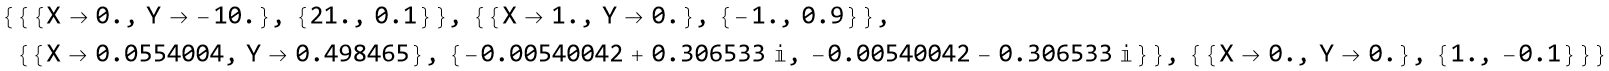
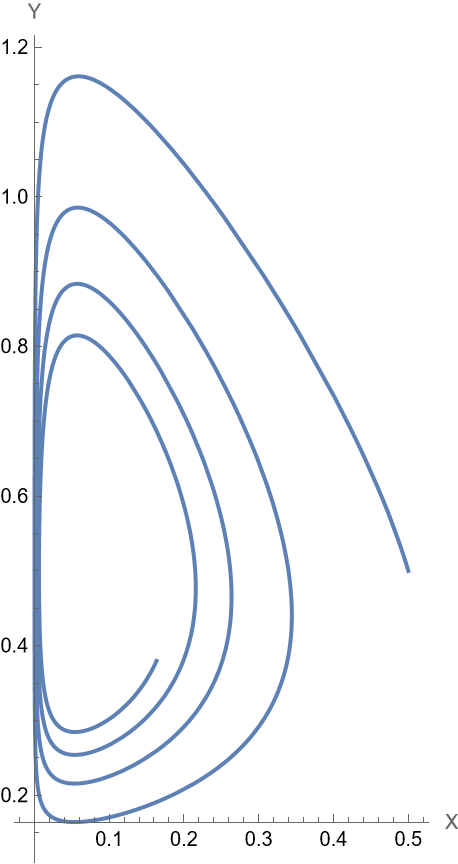
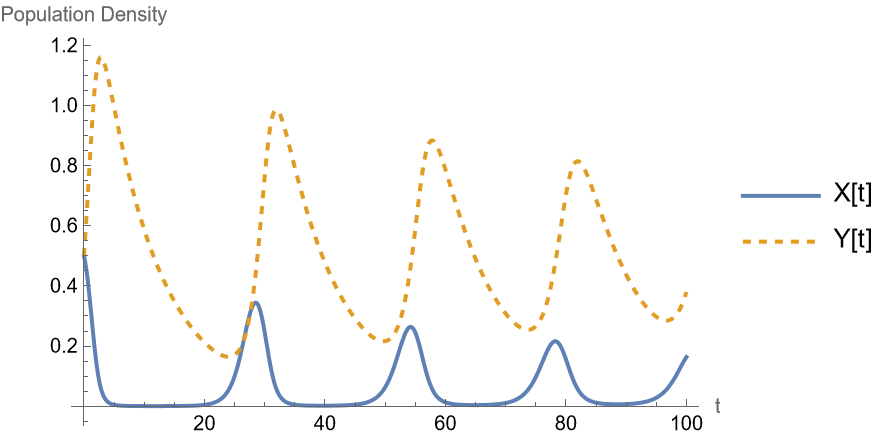
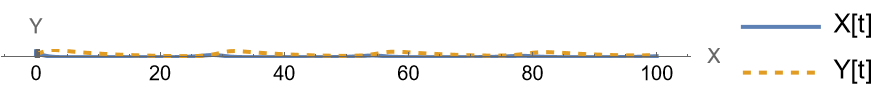
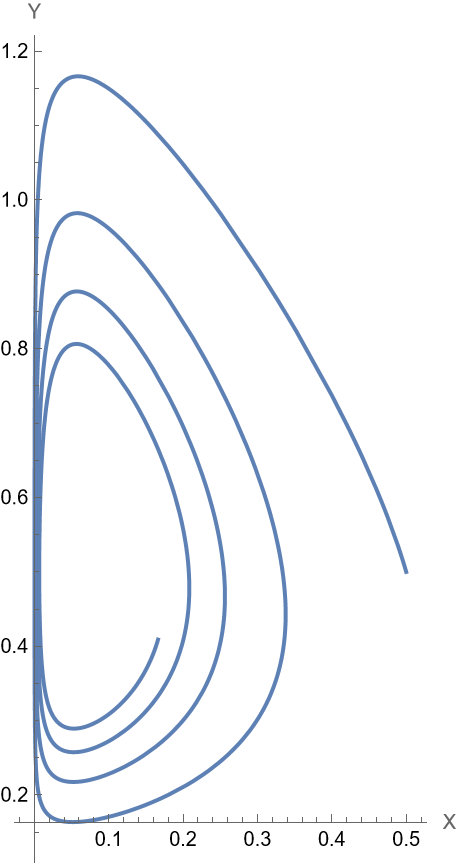
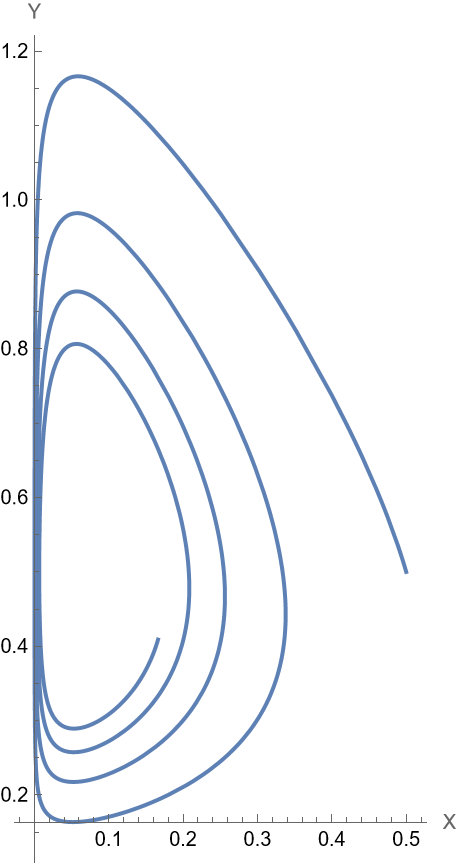

In [36]:
(* 设置参数 *)
m = 2;
n = 1;
p = 0.1;
q = 0.01;

(* 定义无量纲化模型方程 *)
model = {X'[t] == X[t] (1 - X[t]) - (m X[t] Y[t]) / (1 + n X[t]),
          Y'[t] == (m X[t] Y[t]) / (1 + n X[t]) - p Y[t] - q Y[t]^2};

(* 计算平衡点 *)
eqs = {X (1 - X) - (m X Y) / (1 + n X) == 0, (m X Y) / (1 + n X) - p Y - q Y^2 == 0};
sol = NSolve[eqs, {X, Y}, Reals]

(* 输出平衡点 *)
Print["平衡点: ", sol];

(* 计算Jacobian矩阵 *)
jacobian = D[{X[t] (1 - X[t]) - (m X[t] Y[t]) / (1 + n X[t]), 
              (m X[t] Y[t]) / (1 + n X[t]) - p Y[t] - q Y[t]^2}, {{X[t], Y[t]}}];

(* 在平衡点处计算特征值 *)
eigenvalues = Table[
  {Xeq, Yeq} = {X, Y} /. sol[[i]];
  ev = Eigenvalues[jacobian /. {X[t] -> Xeq, Y[t] -> Yeq}];
  {sol[[i]], ev},
  {i, Length[sol]}
]
(* 输出特征值 *)
Print["特征值: ", eigenvalues];

(* 数值模拟 *)
initialConditions = {X[0] == 0.5, Y[0] == 0.5};
solution = NDSolve[{model, initialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制相图 *)
phasePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. solution], {t, 0, 100}, 
                           AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick]

(* 绘制时间序列图 *)
timeSeriesPlot = Plot[Evaluate[{X[t], Y[t]} /. solution], {t, 0, 100}, 
                      PlotLegends -> {"X[t]", "Y[t]"}, AxesLabel -> {"t", "Population Density"}, 
                      PlotRange -> All, PlotStyle -> {Thick, Dashed}]

(* 显示结果 *)
Show[phasePlot, timeSeriesPlot]

(* 分析Hopf分支 *)
hopfForm = {X'[t] == X[t] (1 - X[t]) - (m X[t] Y[t]) / (1 + n X[t]),
            Y'[t] == (m X[t] Y[t]) / (1 + n X[t]) - p Y[t] - q Y[t]^2 + \[Mu] X[t]};

hopfSolution = NDSolve[{hopfForm, initialConditions, \[Mu] == 0.01}, {X, Y}, {t, 0, 100}];

(* 绘制Hopf分支相图 *)
hopfPhasePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. hopfSolution], {t, 0, 100}, 
                               AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick]

(* 显示Hopf分支相图 *)
Show[hopfPhasePlot]


In [80]:
(* 设置参数 *)
m = 2;
n = 1;
p = 0.1;
q = 0.01;

(* 定义无量纲化模型方程 *)
model = {X'[t] == X[t] (1 - X[t]) - (m X[t] Y[t]) / (1 + n X[t]),
          Y'[t] == (m X[t] Y[t]) / (1 + n X[t]) - p Y[t] - q Y[t]^2};

(* 计算平衡点 *)
eqs = {X (1 - X) - (m X Y) / (1 + n X) == 0, (m X Y) / (1 + n X) - p Y - q Y^2 == 0};
sol = NSolve[eqs, {X, Y}, Reals];
Print["平衡点: ", sol];

(* 计算Jacobian矩阵 *)
jacobian = D[{X[t] (1 - X[t]) - (m X[t] Y[t]) / (1 + n X[t]), 
              (m X[t] Y[t]) / (1 + n X[t]) - p Y[t] - q Y[t]^2}, {{X[t], Y[t]}}];

(* 在平衡点处计算特征值 *)
eigenvalues = Table[
  {Xeq, Yeq} = {X, Y} /. sol[[i]];
  ev = Eigenvalues[jacobian /. {X[t] -> Xeq, Y[t] -> Yeq}];
  {sol[[i]], ev},
  {i, Length[sol]}
];
Print["特征值: ", eigenvalues];

(* λ=0 时的分支图 *)
linearModel = {X'[t] == X[t] (1 - X[t]) - (m X[t] Y[t]) / (1 + n X[t]),
               Y'[t] == (m X[t] Y[t]) / (1 + n X[t]) - p Y[t] - q Y[t]^2};
initialConditions = {X[0] == 0.5, Y[0] == 0.5};
solution = NDSolve[{linearModel, initialConditions}, {X, Y}, {t, 0, 100}];
linearPhasePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. solution], {t, 0, 100}, 
                                 AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick];

(* λ>0 时的分支图 *)
λ = 0.01;
perturbedModel = {X'[t] == X[t] (1 - X[t]) - (m X[t] Y[t]) / (1 + n X[t]) + λ X[t],
                  Y'[t] == (m X[t] Y[t]) / (1 + n X[t]) - p Y[t] - q Y[t]^2 + λ Y[t]};
perturbedSolution = NDSolve[{perturbedModel, initialConditions}, {X, Y}, {t, 0, 100}];
perturbedPhasePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. perturbedSolution], {t, 0, 100}, 
                                    AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick];

(* λ>0 时稳定解区域 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};
stableSolution = NDSolve[{perturbedModel, stableInitialConditions}, {X, Y}, {t, 0, 100}];
stablePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100}, 
                            AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick];

(* λ>0 时周期解区域 *)
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};
periodicSolution = NDSolve[{perturbedModel, periodicInitialConditions}, {X, Y}, {t, 0, 100}];


\:5e73\:8861\:70b9: {{X -> 0., Y -> -10.}, {X -> 1., Y -> 0.}, 
 
>    {X -> 0.0554004, Y -> 0.498465}, {X -> 0., Y -> 0.}}
\:7279\:5f81\:503c: {{{X -> 0., Y -> -10.}, {21., 0.1}}, 
 
>    {{X -> 1., Y -> 0.}, {-1., 0.9}}, 
 
>    {{X -> 0.0554004, Y -> 0.498465}, 
 
>     {-0.00540042 + 0.306533 I, -0.00540042 - 0.306533 I}}, 
 
>    {{X -> 0., Y -> 0.}, {1., -0.1}}}


In [113]:
(* 设置参数 *)
m = 2;
n = 1;
p = 0.1;
q = 0.01;

(* 定义无量纲化模型方程 *)
model = {X'[t] == X[t] (1 - X[t]) - (m X[t] Y[t]) / (1 + n X[t]),
          Y'[t] == (m X[t] Y[t]) / (1 + n X[t]) - p Y[t] - q Y[t]^2};

(* 计算平衡点 *)
eqs = {X (1 - X) - (m X Y) / (1 + n X) == 0, (m X Y) / (1 + n X) - p Y - q Y^2 == 0};
sol = NSolve[eqs, {X, Y}, Reals]


{{X -> 0., Y -> -10.}, {X -> 1., Y -> 0.}, {X -> 0.0554004, Y -> 0.498465}, 
 
>   {X -> 0., Y -> 0.}}

-Graphics-
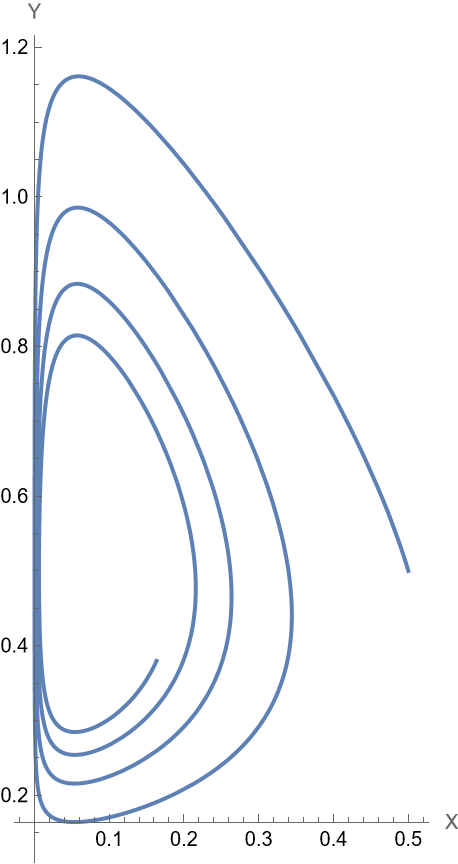

In [123]:
(* 定义 λ=0 时的方程 *)
linearModel = {X'[t] == X[t] (1 - X[t]) - (m X[t] Y[t]) / (1 + n X[t]),
               Y'[t] == (m X[t] Y[t]) / (1 + n X[t]) - p Y[t] - q Y[t]^2};

(* 数值模拟 *)
initialConditions = {X[0] == 0.5, Y[0] == 0.5};
solution = NDSolve[{linearModel, initialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制 λ=0 时的分支图 *)
linearPhasePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. solution], {t, 0, 100}, 
                                 AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick]


-Graphics-
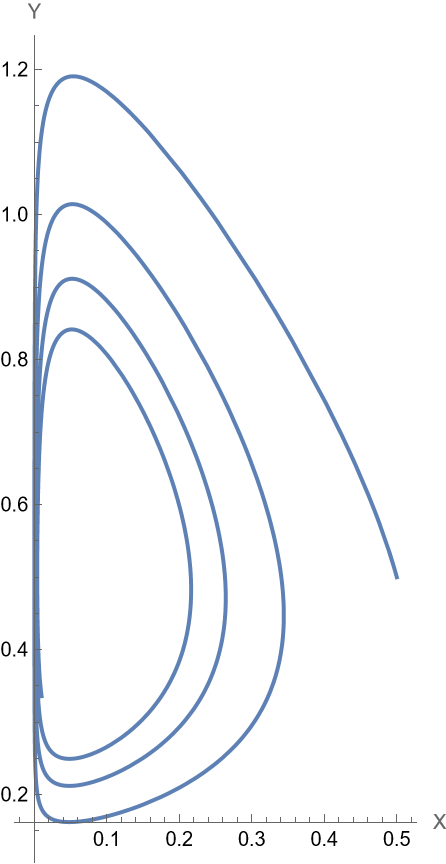

In [130]:
(* 定义 λ>0 时的方程 *)
perturbedModel = {X'[t] == X[t] (1 - X[t]) - (m X[t] Y[t]) / (1 + n X[t]) + λ X[t],
                  Y'[t] == (m X[t] Y[t]) / (1 + n X[t]) - p Y[t] - q Y[t]^2 + λ Y[t]};

(* 数值模拟 *)
λ = 0.01;
perturbedSolution = NDSolve[{perturbedModel, initialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制 λ>0 时的分支图 *)
perturbedPhasePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. perturbedSolution], {t, 0, 100}, 
                                    AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick]


-Graphics-
-Graphics-
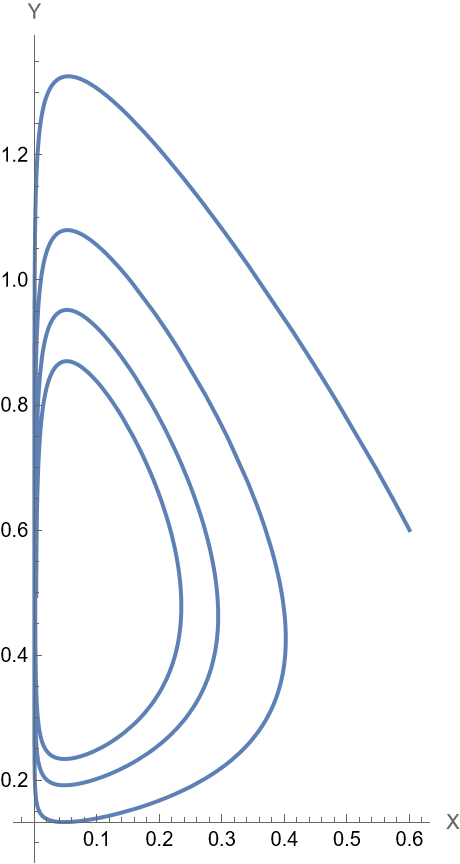
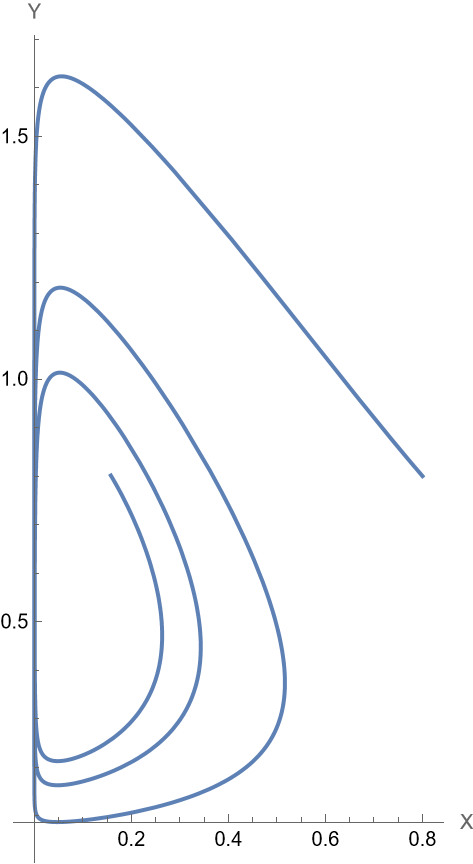

In [137]:
(* 稳定解区域初始条件 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};
stableSolution = NDSolve[{perturbedModel, stableInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制稳定解区域图 *)
stablePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100}, 
                            AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick]

(* 周期解区域初始条件 *)
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};
periodicSolution = NDSolve[{perturbedModel, periodicInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制周期解区域图 *)
periodicPlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. periodicSolution], {t, 0, 100}, 
                              AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick]


\[Lambda]=0 \:65f6\:7684\:5206\:652f\:56fe:
\[Lambda]>0 \:65f6\:7684\:5206\:652f\:56fe:
\[Lambda]>0 \:65f6\:7684\:7a33\:5b9a\:89e3\:533a\:57df\:56fe:
\[Lambda]>0 \:65f6\:7684\:5468\:671f\:89e3\:533a\:57df\:56fe:


-Graphics-
-Graphics-
-Graphics-
-Graphics-
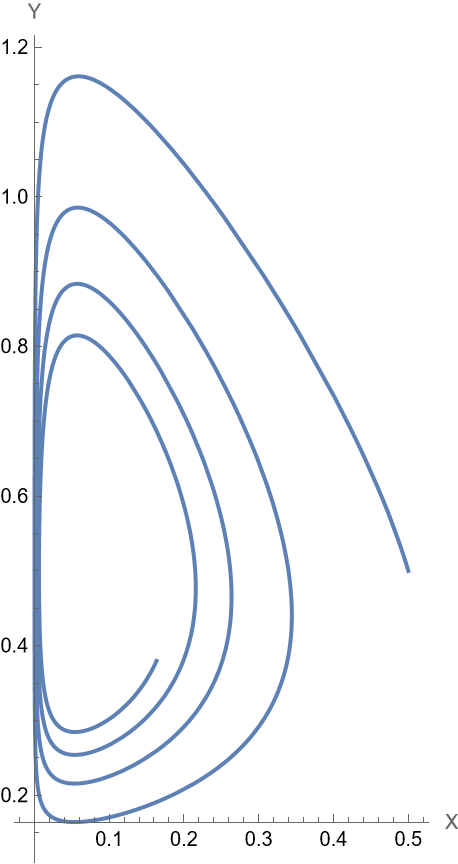
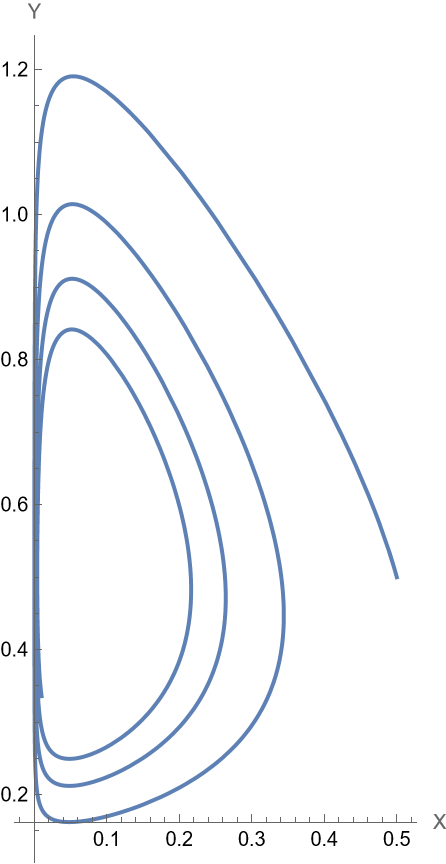
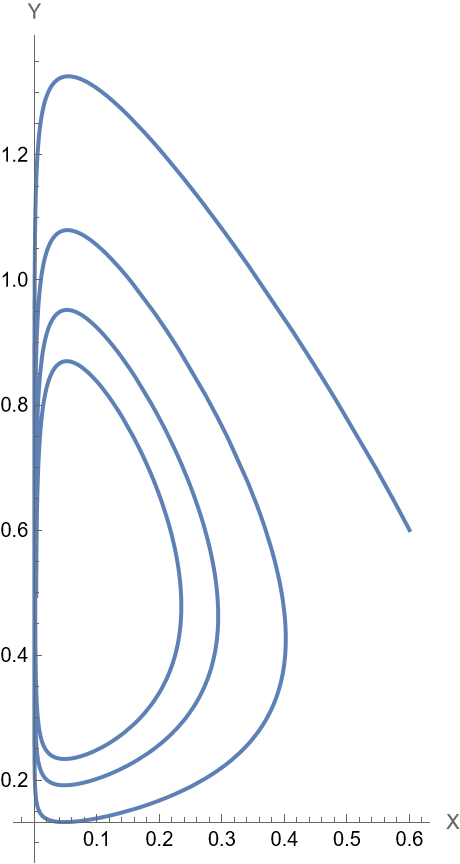
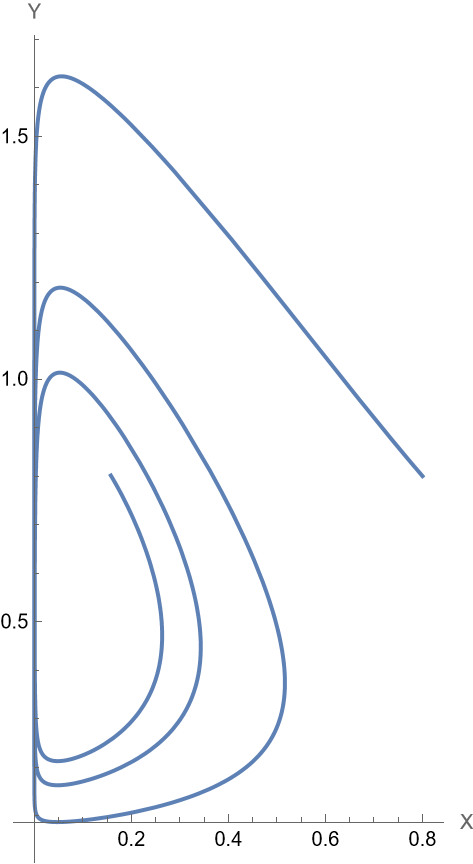

In [147]:
(* 显示 λ=0 时的分支图 *)
Print["λ=0 时的分支图:"]
Show[linearPhasePlot]

(* 显示 λ>0 时的分支图 *)
Print["λ>0 时的分支图:"]
Show[perturbedPhasePlot]

(* 显示 λ>0 时的稳定解区域图 *)
Print["λ>0 时的稳定解区域图:"]
Show[stablePlot]

(* 显示 λ>0 时的周期解区域图 *)
Print["λ>0 时的周期解区域图:"]
Show[periodicPlot]


ContourPlot3D::optx: Unknown option PlotStyle -> Thickness[Large] in ContourPlot3D[R == S (1 - Q) + Î», {R, 0, 2}, {Q, 0, 1}, {S, 0, 2}, AxesLabel -> {R, Q, S}, PlotRange -> All, PlotStyle -> Thick, Mesh -> None, PlotLabel -> Î»>0 æ¶çåæ¯å¾].

-Graphics-
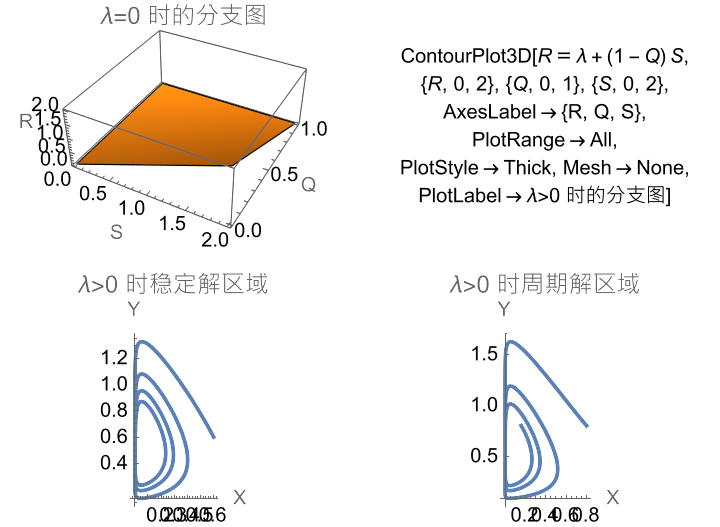

In [159]:
(* 设置参数 *)
m = 2;
n = 1;
p = 0.1;
q = 0.01;

(* 定义参数范围 *)
SRange = {S, 0, 2};
QRange = {Q, 0, 1};

(* 绘制 λ=0 时的分支图 *)
linearBranchPlot = Plot3D[S (1 - Q), {S, 0, 2}, {Q, 0, 1},
                          AxesLabel -> {"S", "Q", "R"}, PlotRange -> All, 
                          PlotStyle -> Thick, Mesh -> None, 
                          PlotLabel -> "λ=0 时的分支图"];

(* 定义迹为0时的条件 *)
λ = 0.01;

(* 计算迹为0时的分支图 *)
perturbedBranchPlot = ContourPlot3D[R == S (1 - Q) + λ, {R, 0, 2}, {Q, 0, 1}, {S, 0, 2},
                                    AxesLabel -> {"R", "Q", "S"}, PlotRange -> All, 
                                    PlotStyle -> Thick, Mesh -> None, 
                                    PlotLabel -> "λ>0 时的分支图"];

(* 定义初始条件 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};

(* 定义无量纲化模型方程 *)
stableModel = {X'[t] == X[t] (1 - X[t]) - (m X[t] Y[t]) / (1 + n X[t]) + λ X[t],
               Y'[t] == (m X[t] Y[t]) / (1 + n X[t]) - p Y[t] - q Y[t]^2 + λ Y[t]};

(* 数值模拟 *)
stableSolution = NDSolve[{stableModel, stableInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制稳定解区域图 *)
stablePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100}, 
                            AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                            PlotLabel -> "λ>0 时稳定解区域"];

(* 周期解区域初始条件 *)
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};

(* 数值模拟 *)
periodicSolution = NDSolve[{stableModel, periodicInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制周期解区域图 *)
periodicPlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. periodicSolution], {t, 0, 100}, 
                              AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                              PlotLabel -> "λ>0 时周期解区域"];

(* 显示所有图像 *)
GraphicsGrid[{{linearBranchPlot, perturbedBranchPlot}, {stablePlot, periodicPlot}}]


-Graphics-
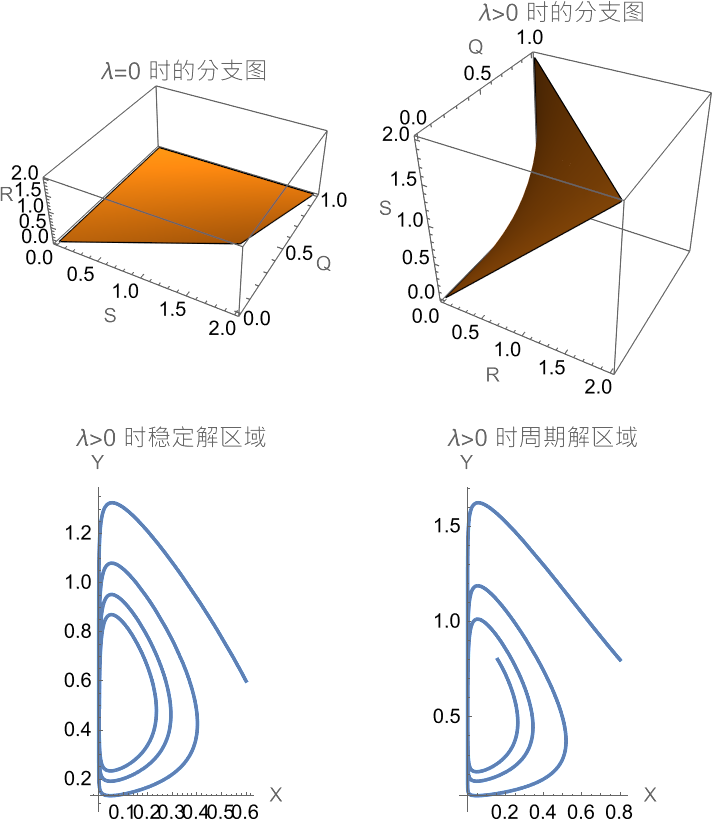

In [251]:
(* 设置参数 *)
m = 2;
n = 1;
p = 0.1;
q = 0.01;

(* 绘制 λ=0 时的分支图 *)
linearBranchPlot = Plot3D[S (1 - Q), {S, 0, 2}, {Q, 0, 1},
                          AxesLabel -> {"S", "Q", "R"}, PlotRange -> All, 
                          Mesh -> None, 
                          PlotLabel -> "λ=0 时的分支图"];

(* 定义迹为0时的条件 *)
λ = 0.01;

(* 计算迹为0时的分支图 *)
perturbedBranchPlot = ContourPlot3D[R == S (1 - Q) + λ, {R, 0, 2}, {Q, 0, 1}, {S, 0, 2},
                                    AxesLabel -> {"R", "Q", "S"}, PlotRange -> All, 
                                    Mesh -> None, 
                                    PlotLabel -> "λ>0 时的分支图"];

(* 定义初始条件 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};

(* 定义无量纲化模型方程 *)
stableModel = {X'[t] == X[t] (1 - X[t]) - (m X[t] Y[t]) / (1 + n X[t]) + λ X[t],
               Y'[t] == (m X[t] Y[t]) / (1 + n X[t]) - p Y[t] - q Y[t]^2 + λ Y[t]};

(* 数值模拟 *)
stableSolution = NDSolve[{stableModel, stableInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制稳定解区域图 *)
stablePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100}, 
                            AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                            PlotLabel -> "λ>0 时稳定解区域"];

(* 周期解区域初始条件 *)
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};

(* 数值模拟 *)
periodicSolution = NDSolve[{stableModel, periodicInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制周期解区域图 *)
periodicPlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. periodicSolution], {t, 0, 100}, 
                              AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                              PlotLabel -> "λ>0 时周期解区域"];

(* 显示所有图像 *)
GraphicsGrid[{{linearBranchPlot, perturbedBranchPlot}, {stablePlot, periodicPlot}}]


\:6a21\:578b\:65b9\:7a0b (\[Lambda]=0): 
 
                                     X[t] Y[t]
>   {X'[t] == 1.5 (1 - X[t]) X[t] - -----------, 
                                    X[t] + Y[t]
 
                           X[t] Y[t]
>    Y'[t] == -0.1 Y[t] + -----------}
                          X[t] + Y[t]
\:6a21\:578b\:65b9\:7a0b (\[Lambda]>0): 
 
                                     X[t] Y[t]
>   {X'[t] == 1.5 (1 - X[t]) X[t] - -----------, 
                                    X[t] + Y[t]
 
                                                 2
                           X[t] Y[t]    0.01 Y[t]
>    Y'[t] == -0.1 Y[t] + ----------- - -----------}
                          X[t] + Y[t]   X[t] + Y[t]


-Graphics-
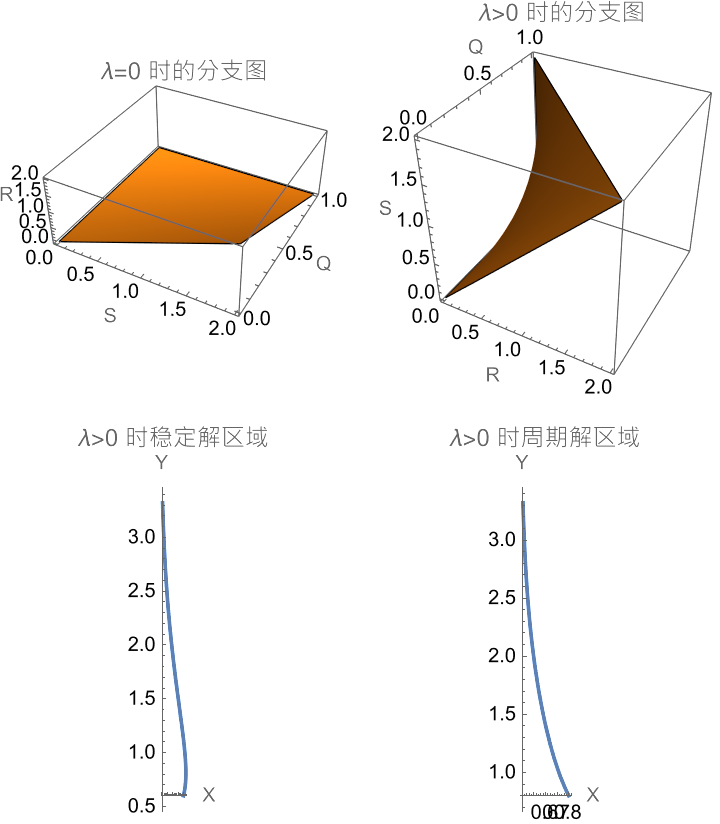

In [278]:
(* 设置参数 *)
R = 1.5;
S = 1;
Q = 0.1;
λ = 0.01; (* λ值 *)

(* 确认无量纲化的捕食者-食饵模型方程 *)
model = {
  X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t]) / (X[t] + Y[t]),
  Y'[t] == -Q Y[t] + (X[t] Y[t]) / (X[t] + Y[t])
};
Print["模型方程 (λ=0): ", model];

(* 确认无量纲化的捕食者-食饵模型方程带有 λ 项 *)
perturbedModel = {
  X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t]) / (X[t] + Y[t]),
  Y'[t] == -Q Y[t] + (X[t] Y[t]) / (X[t] + Y[t]) - (λ Y[t]^2) / (X[t] + Y[t])
};
Print["模型方程 (λ>0): ", perturbedModel];

(* 绘制 λ=0 时的分支图 *)
linearBranchPlot = Plot3D[S (1 - Q), {S, 0, 2}, {Q, 0, 1},
                          AxesLabel -> {"S", "Q", "R"}, PlotRange -> All, 
                          Mesh -> None, 
                          PlotLabel -> "λ=0 时的分支图"];

(* 计算迹为0时的分支图 *)
perturbedBranchPlot = ContourPlot3D[R == S (1 - Q) + λ, {R, 0, 2}, {Q, 0, 1}, {S, 0, 2},
                                    AxesLabel -> {"R", "Q", "S"}, PlotRange -> All, 
                                    Mesh -> None, 
                                    PlotLabel -> "λ>0 时的分支图"];

(* 定义初始条件 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};

(* 数值模拟 *)
stableSolution = NDSolve[{perturbedModel, stableInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制稳定解区域图 *)
stablePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100}, 
                            AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                            PlotLabel -> "λ>0 时稳定解区域"];

(* 周期解区域初始条件 *)
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};

(* 数值模拟 *)
periodicSolution = NDSolve[{perturbedModel, periodicInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制周期解区域图 *)
periodicPlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. periodicSolution], {t, 0, 100}, 
                              AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                              PlotLabel -> "λ>0 时周期解区域"];

(* 显示所有图像 *)
GraphicsGrid[{{linearBranchPlot, perturbedBranchPlot}, {stablePlot, periodicPlot}}]


\:6a21\:578b\:65b9\:7a0b (\[Lambda]=0): 
 
                                     X[t] Y[t]
>   {X'[t] == 1.5 (1 - X[t]) X[t] - -----------, 
                                    X[t] + Y[t]
 
                           X[t] Y[t]
>    Y'[t] == -0.1 Y[t] + -----------}
                          X[t] + Y[t]
\:6a21\:578b\:65b9\:7a0b (\[Lambda]>0): 
 
                                     X[t] Y[t]
>   {X'[t] == 1.5 (1 - X[t]) X[t] - -----------, 
                                    X[t] + Y[t]
 
                                                 2
                           X[t] Y[t]    0.01 Y[t]
>    Y'[t] == -0.1 Y[t] + ----------- - -----------}
                          X[t] + Y[t]   X[t] + Y[t]


-Graphics3D-
-Graphics3D-
-Graphics-
-Graphics-
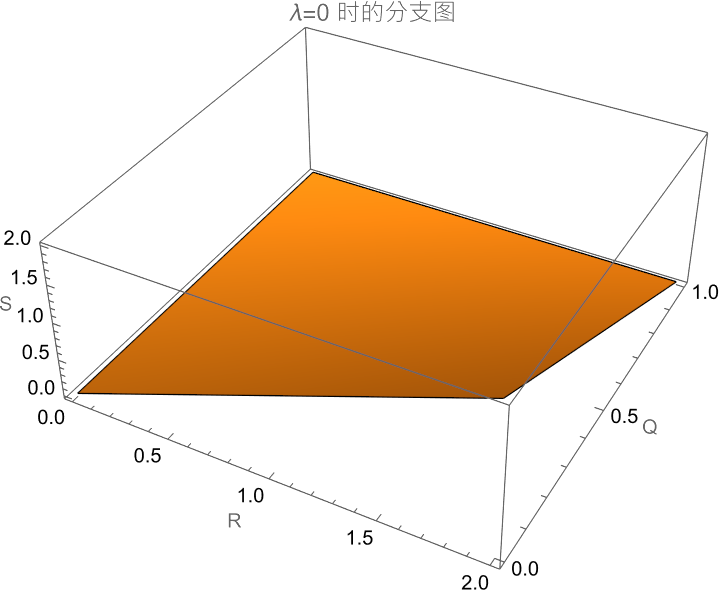
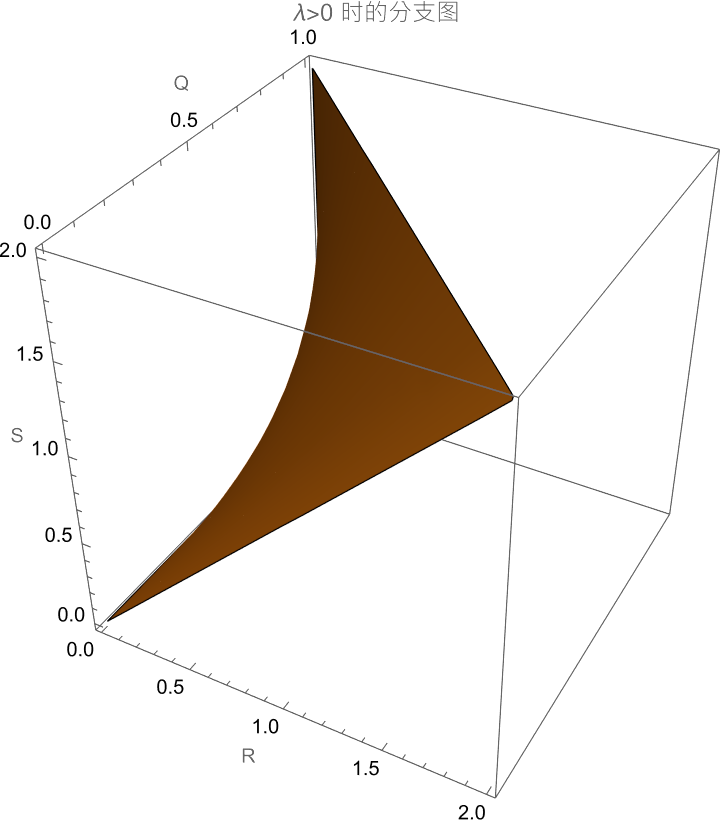
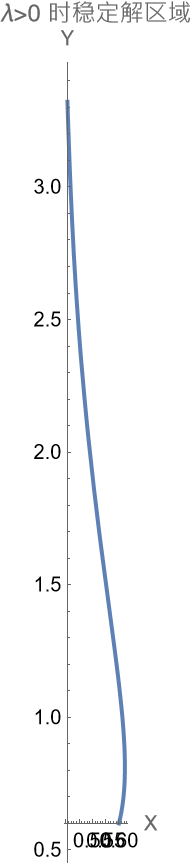
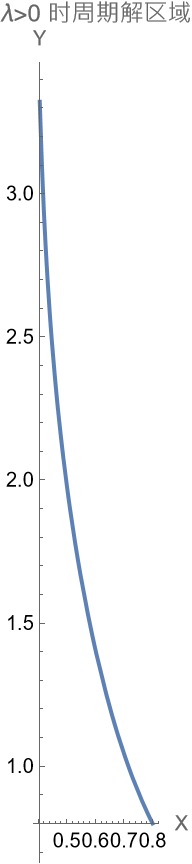

In [307]:
(* 设置参数 *)
R = 1.5;
S = 1;
Q = 0.1;
λ = 0.01; (* λ值 *)

(* 定义无量纲化模型方程 (λ=0) *)
model = {
  X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t]) / (X[t] + Y[t]),
  Y'[t] == -Q Y[t] + (X[t] Y[t]) / (X[t] + Y[t])
};
Print["模型方程 (λ=0): ", model];

(* 定义无量纲化模型方程 (λ>0) *)
perturbedModel = {
  X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t]) / (X[t] + Y[t]),
  Y'[t] == -Q Y[t] + (X[t] Y[t]) / (X[t] + Y[t]) - (λ Y[t]^2) / (X[t] + Y[t])
};
Print["模型方程 (λ>0): ", perturbedModel];

(* 绘制 λ=0 时的分支图 *)
linearBranchPlot = Plot3D[R (1 - Q), {R, 0, 2}, {Q, 0, 1},
                          AxesLabel -> {"R", "Q", "S"}, PlotRange -> All, 
                          Mesh -> None, 
                          PlotLabel -> "λ=0 时的分支图"];
Show[linearBranchPlot]

(* 计算迹为0时的分支图 *)
perturbedBranchPlot = ContourPlot3D[R == S (1 - Q) + λ, {R, 0, 2}, {Q, 0, 1}, {S, 0, 2},
                                    AxesLabel -> {"R", "Q", "S"}, PlotRange -> All, 
                                    Mesh -> None, 
                                    PlotLabel -> "λ>0 时的分支图"];
Show[perturbedBranchPlot]

(* 定义初始条件 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};

(* 数值模拟 *)
stableSolution = NDSolve[{perturbedModel, stableInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制稳定解区域图 *)
stablePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100}, 
                            AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                            PlotLabel -> "λ>0 时稳定解区域"];
Show[stablePlot]

(* 周期解区域初始条件 *)
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};

(* 数值模拟 *)
periodicSolution = NDSolve[{perturbedModel, periodicInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制周期解区域图 *)
periodicPlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. periodicSolution], {t, 0, 100}, 
                              AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                              PlotLabel -> "λ>0 时周期解区域"];
Show[periodicPlot]


\:5e73\:8861\:70b9: {{X -> 0.405941, Y -> 3.32133}, {X -> 1., Y -> 0.}}
\:7279\:5f81\:503c: {{{X -> 0.405941, Y -> 3.32133}, {-0.487433, -0.122448}}, 
 
>    {{X -> 1., Y -> 0.}, {-1.5, 0.9}}}


-Graphics-
-Graphics-
-Graphics-
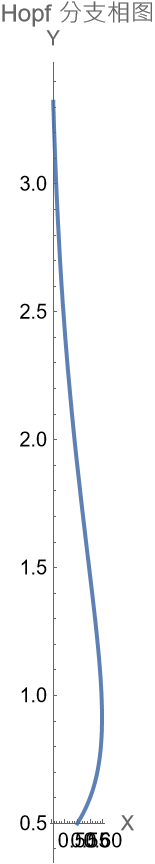
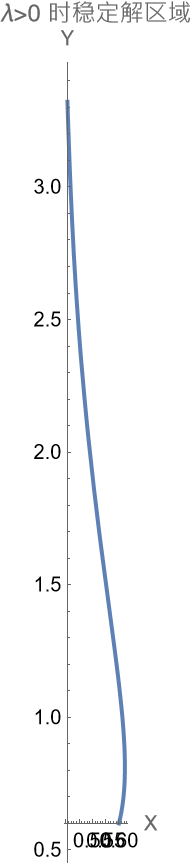
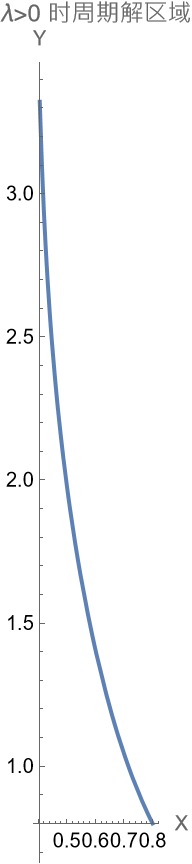

In [366]:
(* 设置参数 *)
R = 1.5;
S = 1;
Q = 0.1;
λ = 0.01; (* λ值 *)

(* 定义模型方程 *)
model = {
  R (1 - X/S^2) X - (S X Y) / (X + Y) == 0,
  -Q Y + (X Y) / (X + Y) - (λ Y^2) / (X + Y) == 0
};

(* 求解平衡点 *)
sol = NSolve[model, {X, Y}, Reals];
Print["平衡点: ", sol];

(* 计算Jacobian矩阵 *)
jacobian = D[{
  R (1 - X/S^2) X - (S X Y) / (X + Y),
  -Q Y + (X Y) / (X + Y) - (λ Y^2) / (X + Y)
}, {{X, Y}}];

(* 在平衡点处计算特征值 *)
eigenvalues = Table[
  {Xeq, Yeq} = {X, Y} /. sol[[i]];
  ev = Eigenvalues[jacobian /. {X -> Xeq, Y -> Yeq}];
  {sol[[i]], ev},
  {i, Length[sol]}
];
Print["特征值: ", eigenvalues];

(* 分析Hopf分支 *)
hopfForm = {
  X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t]) / (X[t] + Y[t]),
  Y'[t] == -Q Y[t] + (X[t] Y[t]) / (X[t] + Y[t]) - (λ Y[t]^2) / (X[t] + Y[t])
};

(* 数值求解 *)
hopfSolution = NDSolve[hopfForm ~Join~ {X[0] == 0.5, Y[0] == 0.5}, {X, Y}, {t, 0, 100}];

(* 绘制Hopf分支相图 *)
hopfPhasePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. hopfSolution], {t, 0, 100}, 
                               AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                               PlotLabel -> "Hopf 分支相图"];
Show[hopfPhasePlot]

(* 定义初始条件 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};

(* 数值模拟 *)
stableSolution = NDSolve[perturbedModel ~Join~ stableInitialConditions, {X, Y}, {t, 0, 100}];
periodicSolution = NDSolve[perturbedModel ~Join~ periodicInitialConditions, {X, Y}, {t, 0, 100}];

(* 绘制稳定解区域图 *)
stablePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100}, 
                            AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                            PlotLabel -> "λ>0 时稳定解区域"];
Show[stablePlot]

(* 绘制周期解区域图 *)
periodicPlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. periodicSolution], {t, 0, 100}, 
                              AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                              PlotLabel -> "λ>0 时周期解区域"];
Show[periodicPlot]


\:6a21\:578b\:65b9\:7a0b (\[Lambda]=0): 
 
                                     X[t] Y[t]
>   {X'[t] == 1.5 (1 - X[t]) X[t] - -----------, 
                                    X[t] + Y[t]
 
                           X[t] Y[t]
>    Y'[t] == -0.1 Y[t] + -----------}
                          X[t] + Y[t]
\:6a21\:578b\:65b9\:7a0b (\[Lambda]>0): 
 
                                     X[t] Y[t]
>   {X'[t] == 1.5 (1 - X[t]) X[t] - -----------, 
                                    X[t] + Y[t]
 
                                                 2
                           X[t] Y[t]    0.01 Y[t]
>    Y'[t] == -0.1 Y[t] + ----------- - -----------}
                          X[t] + Y[t]   X[t] + Y[t]
\:5e73\:8861\:70b9: {{X -> 0.405941, Y -> 3.32133}, {X -> 1., Y -> 0.}}
\:7279\:5f81\:503c: {{{X -> 0.405941, Y -> 3.32133}, {-0.487433, -0.122448}}, 
 
>    {{X -> 1., Y -> 0.}, {-1.5, 0.9}}}


-Graphics-
-Graphics-
-Graphics-
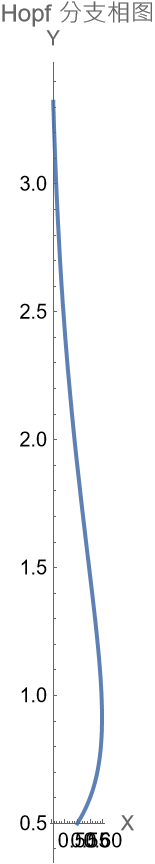
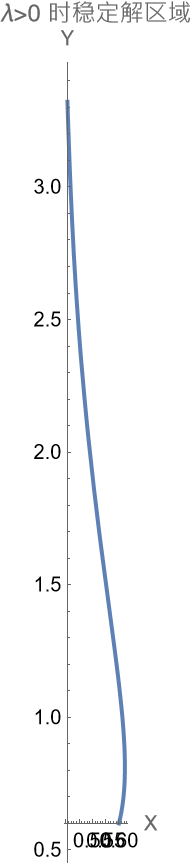
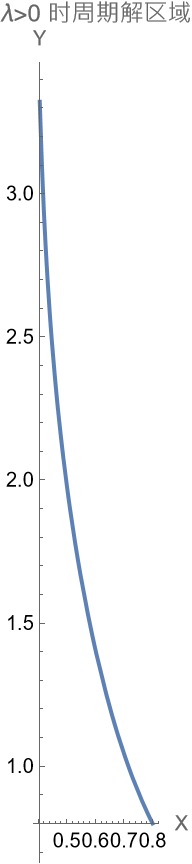

In [400]:
(* 设置参数 *)
R = 1.5;
S = 1;
Q = 0.1;
λ = 0.01; (* λ值 *)

(* 定义模型方程 (λ=0) *)
model = {
  X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t]) / (X[t] + Y[t]),
  Y'[t] == -Q Y[t] + (X[t] Y[t]) / (X[t] + Y[t])
};
Print["模型方程 (λ=0): ", model];

(* 定义模型方程 (λ>0) *)
perturbedModel = {
  X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t]) / (X[t] + Y[t]),
  Y'[t] == -Q Y[t] + (X[t] Y[t]) / (X[t] + Y[t]) - (λ Y[t]^2) / (X[t] + Y[t])
};
Print["模型方程 (λ>0): ", perturbedModel];

(* 求解平衡点 *)
eqs = {R (1 - X/S^2) X - (S X Y) / (X + Y) == 0, -Q Y + (X Y) / (X + Y) - (λ Y^2) / (X + Y) == 0};
sol = NSolve[eqs, {X, Y}, Reals];
Print["平衡点: ", sol];

(* 计算Jacobian矩阵 *)
jacobian = D[{
  R (1 - X/S^2) X - (S X Y) / (X + Y),
  -Q Y + (X Y) / (X + Y) - (λ Y^2) / (X + Y)
}, {{X, Y}}];

(* 在平衡点处计算特征值 *)
eigenvalues = Table[
  {Xeq, Yeq} = {X, Y} /. sol[[i]];
  ev = Eigenvalues[jacobian /. {X -> Xeq, Y -> Yeq}];
  {sol[[i]], ev},
  {i, Length[sol]}
];
Print["特征值: ", eigenvalues];

(* 分析Hopf分支 *)
hopfForm = {
  X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t]) / (X[t] + Y[t]),
  Y'[t] == -Q Y[t] + (X[t] Y[t]) / (X[t] + Y[t]) - (λ Y[t]^2) / (X[t] + Y[t])
};

(* 数值求解 *)
hopfSolution = NDSolve[hopfForm ~Join~ {X[0] == 0.5, Y[0] == 0.5}, {X, Y}, {t, 0, 100}];

(* 绘制Hopf分支相图 *)
hopfPhasePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. hopfSolution], {t, 0, 100}, 
                               AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                               PlotLabel -> "Hopf 分支相图"];
Show[hopfPhasePlot]

(* 定义初始条件 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};

(* 数值模拟 *)
stableSolution = NDSolve[perturbedModel ~Join~ stableInitialConditions, {X, Y}, {t, 0, 100}];
periodicSolution = NDSolve[perturbedModel ~Join~ periodicInitialConditions, {X, Y}, {t, 0, 100}];

(* 绘制稳定解区域图 *)
stablePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100}, 
                            AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                            PlotLabel -> "λ>0 时稳定解区域"];
Show[stablePlot]

(* 绘制周期解区域图 *)
periodicPlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. periodicSolution], {t, 0, 100}, 
                              AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                              PlotLabel -> "λ>0 时周期解区域"];
Show[periodicPlot]


2
        2                 S  (R - S + Q S + R λ)
{{X -> S , Y -> 0}, {X -> ----------------------, 
                                R (1 + λ)
 
                      2
            (-1 + Q) S  (R - S + Q S + R λ)
>    Y -> -(-------------------------------)}}
                   R (1 + λ) (Q + λ)
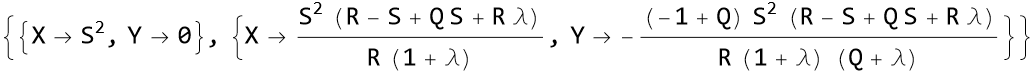

In [48]:
(* 定义参数和方程 *)
eq1 = R (1 - X/S^2) X - S X Y/(X + Y) == 0;
eq2 = -Q Y + X Y/(X + Y) - λ Y^2/(X + Y) == 0;

(* 求解平衡点 *)
sol = Solve[{eq1, eq2}, {X, Y}]


2
       2 R    2 Q R    2 S    4 Q S   2 Q  S   2 R λ   2 Q R λ
{(R - ----- + ----- + ----- - ----- + ------ - ----- + ------- - 
      1 + λ   1 + λ   1 + λ   1 + λ   1 + λ    1 + λ    1 + λ
 
           4
>      (R S  λ) / 
 
                                   2         3            3       2
                2        2        S         S          Q S       S  λ
>       ((1 + λ)  (Q + λ)  Power[----- - --------- + --------- + ----- + 
                                 1 + λ   R (1 + λ)   R (1 + λ)   1 + λ
 
                   2                  2                 3                     3
                  S                Q S                 S                 2 Q S
>           --------------- - --------------- - ----------------- + ----------------- - 
            (1 + λ) (Q + λ)   (1 + λ) (Q + λ)   R (1 + λ) (Q + λ)   R (1 + λ) (Q + λ)
 
                   2  3               2                  2
                  Q  S               S  λ             Q S  λ
>           ----------------- + --------------- - ---------------, 2]) + 
            R (1 + λ) (Q + λ)   (1 + λ) (Q + λ)   (1 + λ) (Q + λ)
 
               4
>      (2 Q R S  λ) / 
 
                                   2         3            3       2
                2        2        S         S          Q S       S  λ
>       ((1 + λ)  (Q + λ)  Power[----- - --------- + --------- + ----- + 
                                 1 + λ   R (1 + λ)   R (1 + λ)   1 + λ
 
                   2                  2                 3                     3
                  S                Q S                 S                 2 Q S
>           --------------- - --------------- - ----------------- + ----------------- - 
            (1 + λ) (Q + λ)   (1 + λ) (Q + λ)   R (1 + λ) (Q + λ)   R (1 + λ) (Q + λ)
 
                   2  3               2                  2
                  Q  S               S  λ             Q S  λ
>           ----------------- + --------------- - ---------------, 2]) - 
            R (1 + λ) (Q + λ)   (1 + λ) (Q + λ)   (1 + λ) (Q + λ)
 
         2    4
>      (Q  R S  λ) / 
 
                                   2         3            3       2
                2        2        S         S          Q S       S  λ
>       ((1 + λ)  (Q + λ)  Power[----- - --------- + --------- + ----- + 
                                 1 + λ   R (1 + λ)   R (1 + λ)   1 + λ
 
                   2                  2                 3                     3
                  S                Q S                 S                 2 Q S
>           --------------- - --------------- - ----------------- + ----------------- - 
            (1 + λ) (Q + λ)   (1 + λ) (Q + λ)   R (1 + λ) (Q + λ)   R (1 + λ) (Q + λ)
 
                   2  3               2                  2
                  Q  S               S  λ             Q S  λ
>           ----------------- + --------------- - ---------------, 2]) + 
            R (1 + λ) (Q + λ)   (1 + λ) (Q + λ)   (1 + λ) (Q + λ)
 
           5
>      (3 S  λ) / 
 
                                   2         3            3       2
                2        2        S         S          Q S       S  λ
>       ((1 + λ)  (Q + λ)  Power[----- - --------- + --------- + ----- + 
                                 1 + λ   R (1 + λ)   R (1 + λ)   1 + λ
 
                   2                  2                 3                     3
                  S                Q S                 S                 2 Q S
>           --------------- - --------------- - ----------------- + ----------------- - 
            (1 + λ) (Q + λ)   (1 + λ) (Q + λ)   R (1 + λ) (Q + λ)   R (1 + λ) (Q + λ)
 
                   2  3               2                  2
                  Q  S               S  λ             Q S  λ
>           ----------------- + --------------- - ---------------, 2]) - 
            R (1 + λ) (Q + λ)   (1 + λ) (Q + λ)   (1 + λ) (Q + λ)
 
             5
>      (8 Q S  λ) / 
 
                                   2         3            3       2
                2
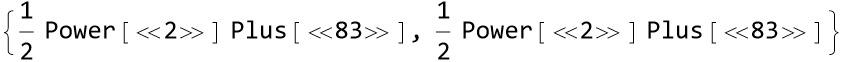

In [53]:
(* 定义Jacobian矩阵 *)
jacobian = D[{R (1 - X/S^2) X - S X Y/(X + Y), -Q Y + X Y/(X + Y) - λ Y^2/(X + Y)}, {{X, Y}}];

(* 在平衡点处求解特征值 *)
eigenvalues = Eigenvalues[jacobian /. sol]


In [80]:
(* 定义参数和方程 *)
ClearAll[X, Y, R, S, Q, λ, ω];
params = {R, S, Q, λ};

(* 定义方程 *)
eq1 = R (1 - X/S^2) X - S X Y/(X + Y);
eq2 = -Q Y + X Y/(X + Y) - λ Y^2/(X + Y);

(* 求解平衡点 *)
sol = Solve[{eq1 == 0, eq2 == 0}, {X, Y}];
Print["平衡点: ", sol];

(* 计算Jacobian矩阵 *)
jacobian = D[{eq1, eq2}, {{X, Y}}];

(* 在每个平衡点处求解特征值 *)
eigenvalues = Eigenvalues[jacobian /. sol[[2]]]; (* 选择第二个平衡点 *)
Print["特征值: ", Simplify[eigenvalues]];


                            2
\:5e73\:8861\:70b9: {{X -> S , Y -> 0}, 
 
            2
           S  (R - S + Q S + R \[Lambda])
>    {X -> ------------------------------, 
                 R (1 + \[Lambda])
 
                       2
             (-1 + Q) S  (R - S + Q S + R \[Lambda])
>     Y -> -(---------------------------------------)}}
                R (1 + \[Lambda]) (Q + \[Lambda])
                       1        2            2                  2
\:7279\:5f81\:503c: {-(-) (Q - Q  + R - S + Q  S + \[Lambda] - Q  \[Lambda] + 
                       2
 
                                                                    2
>        2 R \[Lambda] - 2 S \[Lambda] + 2 Q S \[Lambda] + \[Lambda]  - 
 
                    2              2
>        Q \[Lambda]  + R \[Lambda]  + 
 
                                        2
>        Sqrt[4 (-1 + Q) (1 + \[Lambda])  (Q + \[Lambda]) 
 
>           ((-1 + Q) S + R (1 + \[Lambda])) + 
 
                       2
>          Power[-S + Q  (-1 + S

In [94]:
(* 检查特征值是否有复数部分 *)
complexEigenvalues = Simplify[eigenvalues /. sol[[2]], Assumptions -> {R > 0, S > 0, Q > 0, λ >= 0}];
Print["特征值（简化后）: ", complexEigenvalues];


\:7279\:5f81\:503c\:ff08\:7b80\:5316\:540e\:ff09: 
 
       1        2            2                  2
>   {-(-) (Q - Q  + R - S + Q  S + \[Lambda] - Q  \[Lambda] + 2 R \[Lambda] - 
       2
 
                                                    2              2
>        2 S \[Lambda] + 2 Q S \[Lambda] + \[Lambda]  - Q \[Lambda]  + 
 
                    2                                  2
>        R \[Lambda]  + Sqrt[4 (-1 + Q) (1 + \[Lambda])  (Q + \[Lambda]) 
 
>           ((-1 + Q) S + R (1 + \[Lambda])) + 
 
                       2
>          Power[-S + Q  (-1 + S - \[Lambda]) + \[Lambda] - 2 S \[Lambda] + 
 
                      2                    2
>            \[Lambda]  + R (1 + \[Lambda])  + 
 
                                             2                         2
>            Q (1 + 2 S \[Lambda] - \[Lambda] ), 2]]) / (1 + \[Lambda]) , 
 
       1        2            2                  2
>    -(-) (Q - Q  + R - S + Q  S + \[Lambda] - Q  \[Lambda] + 2 R \[Lambda] - 
   

In [97]:
(* 分析Hopf分支条件 *)
hopfCondition = Solve[{Re[complexEigenvalues[[1]]] == 0, Re[complexEigenvalues[[2]]] == 0}, λ, Reals];
Print["Hopf分支条件: ", hopfCondition];


Hopf\:5206\:652f\:6761\:4ef6: {}


In [100]:
(* 简化特征值表达式 *)
eigenvaluesSimplified = Simplify[eigenvalues /. sol[[2]], Assumptions -> {R > 0, S > 0, Q > 0, λ >= 0}];
Print["特征值（简化后）: ", eigenvaluesSimplified];


\:7279\:5f81\:503c\:ff08\:7b80\:5316\:540e\:ff09: 
 
       1        2            2                  2
>   {-(-) (Q - Q  + R - S + Q  S + \[Lambda] - Q  \[Lambda] + 2 R \[Lambda] - 
       2
 
                                                    2              2
>        2 S \[Lambda] + 2 Q S \[Lambda] + \[Lambda]  - Q \[Lambda]  + 
 
                    2                                  2
>        R \[Lambda]  + Sqrt[4 (-1 + Q) (1 + \[Lambda])  (Q + \[Lambda]) 
 
>           ((-1 + Q) S + R (1 + \[Lambda])) + 
 
                       2
>          Power[-S + Q  (-1 + S - \[Lambda]) + \[Lambda] - 2 S \[Lambda] + 
 
                      2                    2
>            \[Lambda]  + R (1 + \[Lambda])  + 
 
                                             2                         2
>            Q (1 + 2 S \[Lambda] - \[Lambda] ), 2]]) / (1 + \[Lambda]) , 
 
       1        2            2                  2
>    -(-) (Q - Q  + R - S + Q  S + \[Lambda] - Q  \[Lambda] + 2 R \[Lambda] - 
   

In [103]:
(* 分析Hopf分支条件 *)
hopfCondition = Solve[{Re[eigenvaluesSimplified[[1]]] == 0, Re[eigenvaluesSimplified[[2]]] == 0, 
                      Im[eigenvaluesSimplified[[1]]] != 0, Im[eigenvaluesSimplified[[2]]] != 0}, {λ, Q, R}, Reals];
Print["Hopf分支条件: ", hopfCondition];


Hopf\:5206\:652f\:6761\:4ef6: {}


Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

\:5e73\:8861\:70b9: {{X -> 1., Y -> 0.}, 
 
           0.2 (2. + 5. \[Lambda])             1.8 (2. + 5. \[Lambda])
>    {X -> -----------------------, Y -> -----------------------------------}}
               1. + \[Lambda]                                              2
                                         1. + 11. \[Lambda] + 10. \[Lambda]
                                                                    2
\:7279\:5f81\:503c: {(-((0.096 + 1.2144 \[Lambda] + 6.6336 \[Lambda]  + 
 
                              3                    4                    5
>            20.4204 \[Lambda]  + 38.6736 \[Lambda]  + 46.0344 \[Lambda]  + 
 
                             6                  7                8
>            33.576 \[Lambda]  + 13.71 \[Lambda]  + 2.4 \[Lambda] ) / 
 
                                               2               3 2
>          (0.4 + 1.8 \[Lambda] + 2.4 \[Lambda]  + 1. \[Lambda] ) ) - 
 
                                                              2
>       Sqr

0.2 (2. + 5. λ)         1.8 (2. + 5. λ)
{{X -> 1., Y -> 0.}, {X -> ---------------, Y -> -------------------}}
                               1. + λ                              2
                                                 1. + 11. λ + 10. λ
                              2            3            4            5           6
{(-0.048 - 0.6072 λ - 3.3168 λ  - 10.2102 λ  - 19.3368 λ  - 23.0172 λ  - 16.788 λ  - 
 
              7        8                                                2
>      6.855 λ  - 1.2 λ  - 0.5 Sqrt[0.0036864 + 0.0534528 λ + 0.218627 λ  - 
 
                    3            4            5            6            7           8
>         0.917868 λ  - 14.6401 λ  - 81.1862 λ  - 276.504 λ  - 651.574 λ  - 1111.6 λ  - 
 
                   9            10            11            12            13
>         1396.48 λ  - 1291.24 λ   - 863.742 λ   - 401.192 λ   - 118.201 λ   - 
 
                   14          15         16
>         16.9911 λ   + 0.468 λ   + 0.36 λ  ]) / 
 
              2                     2       3 2
>    ((1. + λ)  (0.4 + 1.8 λ + 2.4 λ  + 1. λ ) ), 
 
                                 2            3            4            5           6
>   (-0.048 - 0.6072 λ - 3.3168 λ  - 10.2102 λ  - 19.3368 λ  - 23.0172 λ  - 16.788 λ  - 
 
              7        8                                                2
>      6.855 λ  - 1.2 λ  + 0.5 Sqrt[0.0036864 + 0.0534528 λ + 0.218627 λ  - 
 
                    3            4            5            6            7           8
>         0.917868 λ  - 14.6401 λ  - 81.1862 λ  - 276.504 λ  - 651.574 λ  - 1111.6 λ  - 
 
                   9            10            11            12            13
>         1396.48 λ  - 1291.24 λ   - 863.742 λ   - 401.192 λ   - 118.201 λ   - 
 
                   14          15         16
>         16.9911 λ   + 0.468 λ   + 0.36 λ  ]) / 
 
              2                     2       3 2
>    ((1. + λ)  (0.4 + 1.8 λ + 2.4 λ  + 1. λ ) )}
                              2            3            4            5           6
{(-0.048 - 0.6072 λ - 3.3168 λ  - 10.2102 λ  - 19.3368 λ  - 23.0172 λ  - 16.788 λ  - 
 
              7        8                                                2
>      6.855 λ  - 1.2 λ  - 0.5 Sqrt[0.0036864 + 0.0534528 λ + 0.218627 λ  - 
 
                    3            4            5            6            7           8
>         0.917868 λ  - 14.6401 λ  - 81.1862 λ  - 276.504 λ  - 651.574 λ  - 1111.6 λ  - 
 
                   9            10            11            12            13
>         1396.48 λ  - 1291.24 λ   - 863.742 λ   - 401.192 λ   - 118.201 λ   - 
 
                   14          15         16
>         16.9911 λ   + 0.468 λ   + 0.36 λ  ]) / 
 
              2                     2       3 2
>    ((1. + λ)  (0.4 + 1.8 λ + 2.4 λ  + 1. λ ) ), 
 
                                 2            3            4            5           6
>   (-0.048 - 0.6072 λ - 3.3168 λ  - 10.2102 λ  - 19.3368 λ  - 23.0172 λ  - 16.788 λ  - 
 
              7        8                                                2
>      6.855 λ  - 1.2 λ  + 0.5 Sqrt[0.0036864 + 0.0534528 λ + 0.218627 λ  - 
 
                    3            4            5            6            7           8
>         0.917868 λ  - 14.6401 λ  - 81.1862 λ  - 276.504 λ  - 651.574 λ  - 1111.6 λ  - 
 
                   9            10            11            12            13
>         1396.48 λ  - 1291.24 λ   - 863.742 λ   - 401.192 λ   - 118.201 λ   - 
 
                   14          15         16
>         16.9911 λ   + 0.468 λ   + 0.36 λ  ]) / 
 
              2                     2       3 2
>    ((1. + λ)  (0.4 + 1.8 λ + 2.4 λ  + 1. λ ) )}
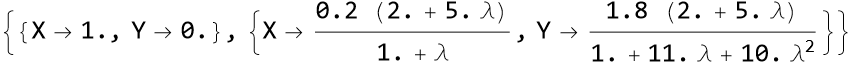
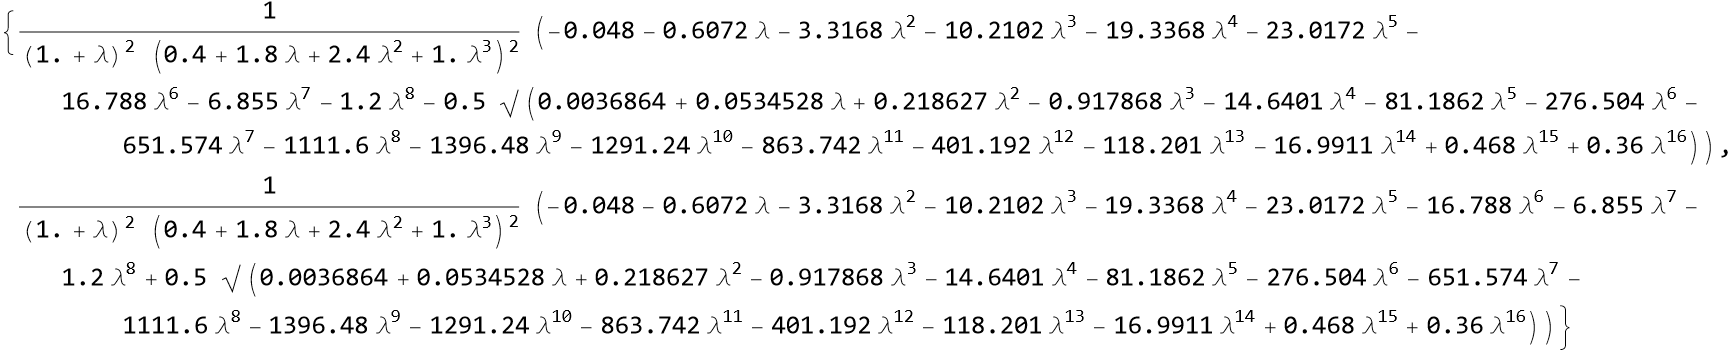
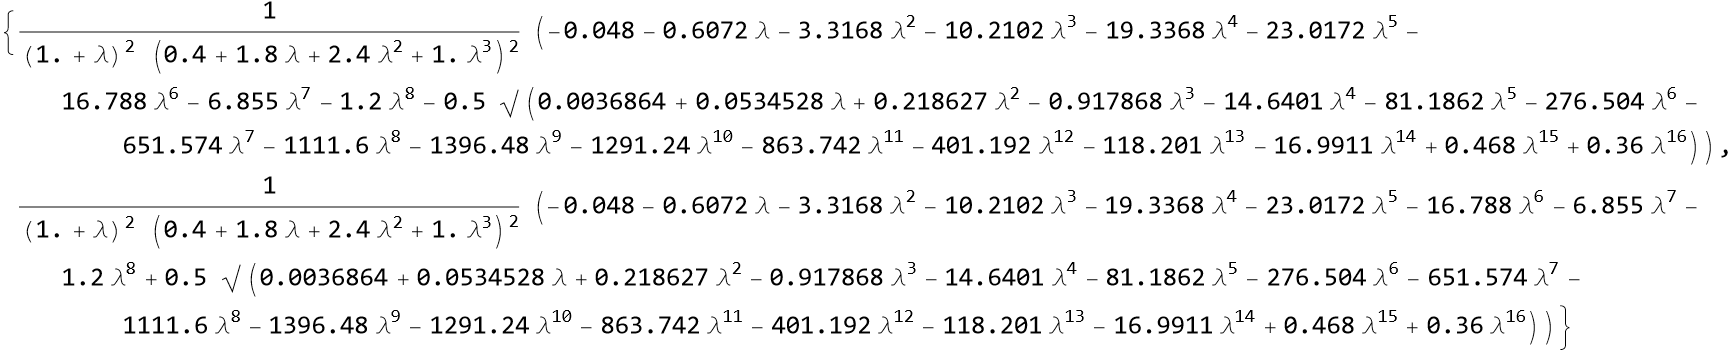

In [106]:
ClearAll[X, Y, R, S, Q, λ, ω];

(* 设置参数 *)
R = 1.5;
S = 1;
Q = 0.1;

(* 定义方程 *)
eq1 = R (1 - X/S^2) X - S X Y/(X + Y);
eq2 = -Q Y + X Y/(X + Y) - λ Y^2/(X + Y);

(* 求解平衡点 *)
sol = Solve[{eq1 == 0, eq2 == 0}, {X, Y}]
Print["平衡点: ", sol];

(* 计算Jacobian矩阵 *)
jacobian = D[{eq1, eq2}, {{X, Y}}];

(* 在每个平衡点处求解特征值 *)
eigenvalues = Eigenvalues[jacobian /. sol[[2]]]; (* 选择第二个平衡点 *)
Print["特征值: ", eigenvalues];

(* 简化特征值 *)
eigenvaluesSimplified = Simplify[eigenvalues, Assumptions -> {λ >= 0}]
Print["特征值（简化后）: ", eigenvaluesSimplified];

(* 检查特征值是否有复数部分 *)
complexEigenvalues = Simplify[eigenvaluesSimplified, Assumptions -> {λ >= 0}]
Print["特征值（复数部分）: ", complexEigenvalues];


Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

\:5e73\:8861\:70b9: {{X -> 1., Y -> 0.}, 
 
           0.2 (2. + 5. \[Lambda])             1.8 (2. + 5. \[Lambda])
>    {X -> -----------------------, Y -> -----------------------------------}}
               1. + \[Lambda]                                              2
                                         1. + 11. \[Lambda] + 10. \[Lambda]
                                                                    2
\:7279\:5f81\:503c: {(-((0.096 + 1.2144 \[Lambda] + 6.6336 \[Lambda]  + 
 
                              3                    4                    5
>            20.4204 \[Lambda]  + 38.6736 \[Lambda]  + 46.0344 \[Lambda]  + 
 
                             6                  7                8
>            33.576 \[Lambda]  + 13.71 \[Lambda]  + 2.4 \[Lambda] ) / 
 
                                               2               3 2
>          (0.4 + 1.8 \[Lambda] + 2.4 \[Lambda]  + 1. \[Lambda] ) ) - 
 
                                                              2
>       Sqr

0.2 (2. + 5. λ)         1.8 (2. + 5. λ)
{{X -> 1., Y -> 0.}, {X -> ---------------, Y -> -------------------}}
                               1. + λ                              2
                                                 1. + 11. λ + 10. λ
                              2            3            4            5           6
{(-0.048 - 0.6072 λ - 3.3168 λ  - 10.2102 λ  - 19.3368 λ  - 23.0172 λ  - 16.788 λ  - 
 
              7        8                                                2
>      6.855 λ  - 1.2 λ  - 0.5 Sqrt[0.0036864 + 0.0534528 λ + 0.218627 λ  - 
 
                    3            4            5            6            7           8
>         0.917868 λ  - 14.6401 λ  - 81.1862 λ  - 276.504 λ  - 651.574 λ  - 1111.6 λ  - 
 
                   9            10            11            12            13
>         1396.48 λ  - 1291.24 λ   - 863.742 λ   - 401.192 λ   - 118.201 λ   - 
 
                   14          15         16
>         16.9911 λ   + 0.468 λ   + 0.36 λ  ]) / 
 
              2                     2       3 2
>    ((1. + λ)  (0.4 + 1.8 λ + 2.4 λ  + 1. λ ) ), 
 
                                 2            3            4            5           6
>   (-0.048 - 0.6072 λ - 3.3168 λ  - 10.2102 λ  - 19.3368 λ  - 23.0172 λ  - 16.788 λ  - 
 
              7        8                                                2
>      6.855 λ  - 1.2 λ  + 0.5 Sqrt[0.0036864 + 0.0534528 λ + 0.218627 λ  - 
 
                    3            4            5            6            7           8
>         0.917868 λ  - 14.6401 λ  - 81.1862 λ  - 276.504 λ  - 651.574 λ  - 1111.6 λ  - 
 
                   9            10            11            12            13
>         1396.48 λ  - 1291.24 λ   - 863.742 λ   - 401.192 λ   - 118.201 λ   - 
 
                   14          15         16
>         16.9911 λ   + 0.468 λ   + 0.36 λ  ]) / 
 
              2                     2       3 2
>    ((1. + λ)  (0.4 + 1.8 λ + 2.4 λ  + 1. λ ) )}
                                                            1
Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[--], 
                                                            72
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[2]]}, {实部}, 
 
>     LegendMarkers -> 
 
>      {{False, Automatic}, {False, Automatic}, {False, Automatic}, {False, Automatic}, 
 
>       {False, Automatic}, {False, Automatic}, {False, Automatic}, {False, Automatic}, 
 
>       {False, Automatic}, {False, Automatic}, {False, Automatic}, {False, Automatic}, 
 
>       {False, Automatic}, {False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {True, True, True, True, True, True, True, True, True, True, True, True, 
 
>       True, True, True, True, True, True, True, True, True, True, True, True, True, 
 
>       True, True, True, True, True, True, True, True, True, True, True, True, True, 
 
>       True, True, True, True, True, True, True, True, True, True, True, True, True, 
 
>       True, True, True, True, True, True, True, True, True, True, True, True, True, 
 
>       True, True, True, True, True, True, True, True, True, True, True, True, True, 
 
>       True, True, True, True, True, True, True, True, True, True, True, True, True, 
 
>       True, True, True, True, True, True, True, True, True, True, True}, 
 
>     LabelStyle -> {}, LegendLayout -> Column], After, Identity]]
                                                            1
Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[--], 
                                                            60
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[2]]}, {虚部}, 
 
>     LegendMarkers -> 
 
>      {{False, Automatic}, {False, Automatic}, {False, Automatic}, {False, Automatic}, 
 
>       {False, Automatic}, {False, Automatic}, {False, Automatic}, {False, Automatic}, 
 
>       {False, Automatic}, {False, Automatic}, {False, Automatic}, {False, Automatic}, 
 
>       {False, Automatic}, {False, Automati
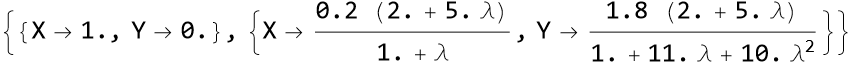
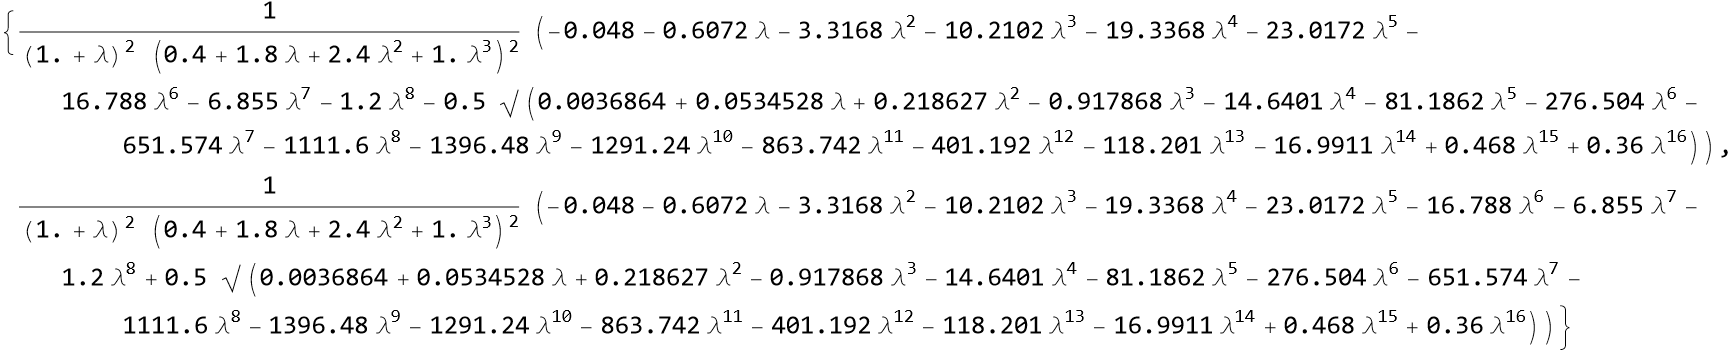
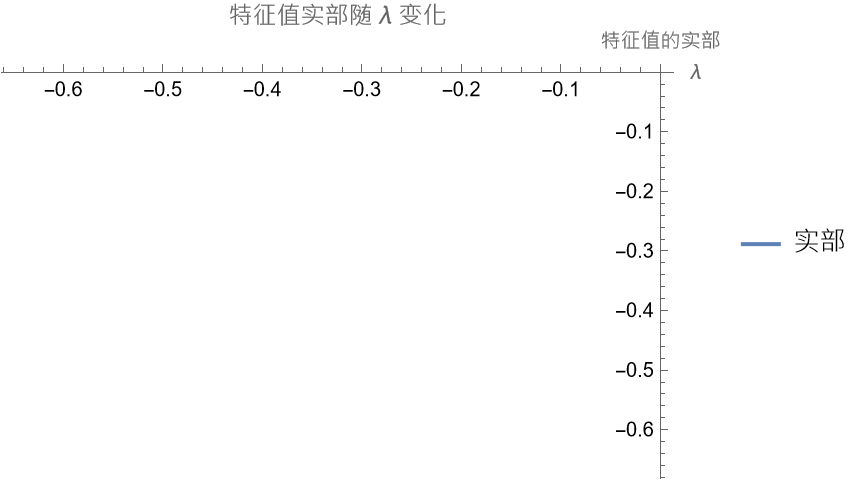
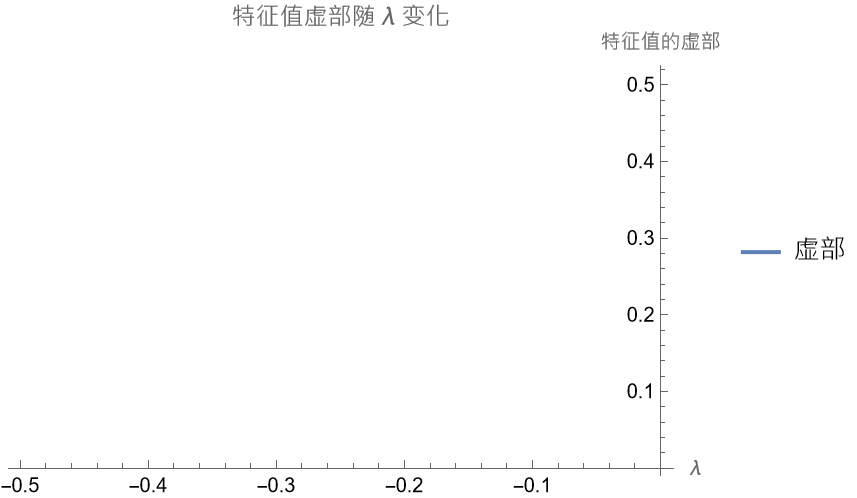
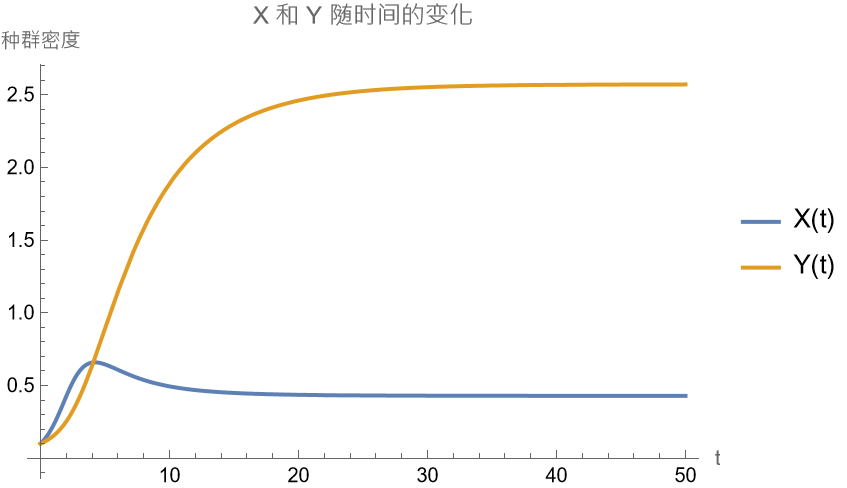

In [128]:
ClearAll[X, Y, R, S, Q, λ, t];
R = 1.5;
S = 1;
Q = 0.1;

(* 定义方程 *)
eq1 = R (1 - X/S^2) X - S X Y/(X + Y);
eq2 = -Q Y + X Y/(X + Y) - λ Y^2/(X + Y);

(* 求解平衡点 *)
sol = Solve[{eq1 == 0, eq2 == 0}, {X, Y}]
Print["平衡点: ", sol];

(* 计算Jacobian矩阵 *)
jacobian = D[{eq1, eq2}, {{X, Y}}];

(* 在每个平衡点处求解特征值 *)
eigenvalues = Eigenvalues[jacobian /. sol[[2]]]; (* 选择第二个平衡点 *)
Print["特征值: ", eigenvalues];

(* 简化特征值 *)
eigenvaluesSimplified = Simplify[eigenvalues, Assumptions -> {λ >= 0}]
Print["特征值（简化后）: ", eigenvaluesSimplified];

(* 数值化特征值 *)
λValues = Range[0, 1, 0.01];
numEigenvalues = Table[eigenvalues /. λ -> λVal, {λVal, λValues}];
realPart = Re[numEigenvalues];
imagPart = Im[numEigenvalues];

(* 绘制特征值的实部和虚部随 λ 变化的图像 *)
ListLinePlot[Transpose[{λValues, realPart}], PlotLegends -> {"实部"}, 
             AxesLabel -> {"λ", "特征值的实部"}, PlotLabel -> "特征值实部随 λ 变化"]
ListLinePlot[Transpose[{λValues, imagPart}], PlotLegends -> {"虚部"}, 
             AxesLabel -> {"λ", "特征值的虚部"}, PlotLabel -> "特征值虚部随 λ 变化"]

(* 数值模拟捕食者-食饵模型 *)
λVal = 0.05; (* 设置 λ 的具体值 *)
solNDSolve = NDSolve[
  {X'[t] == R (1 - X[t]/S^2) X[t] - S X[t] Y[t]/(X[t] + Y[t]),
   Y'[t] == -Q Y[t] + X[t] Y[t]/(X[t] + Y[t]) - λVal Y[t]^2/(X[t] + Y[t]),
   X[0] == 0.1, Y[0] == 0.1},
  {X, Y}, {t, 0, 50}];

(* 绘制 X 和 Y 随时间变化的图像 *)
Plot[Evaluate[{X[t], Y[t]} /. solNDSolve], {t, 0, 50}, 
     PlotLegends -> {"X(t)", "Y(t)"}, AxesLabel -> {"t", "种群密度"}, 
     PlotLabel -> "X 和 Y 随时间的变化"]


-Graphics-
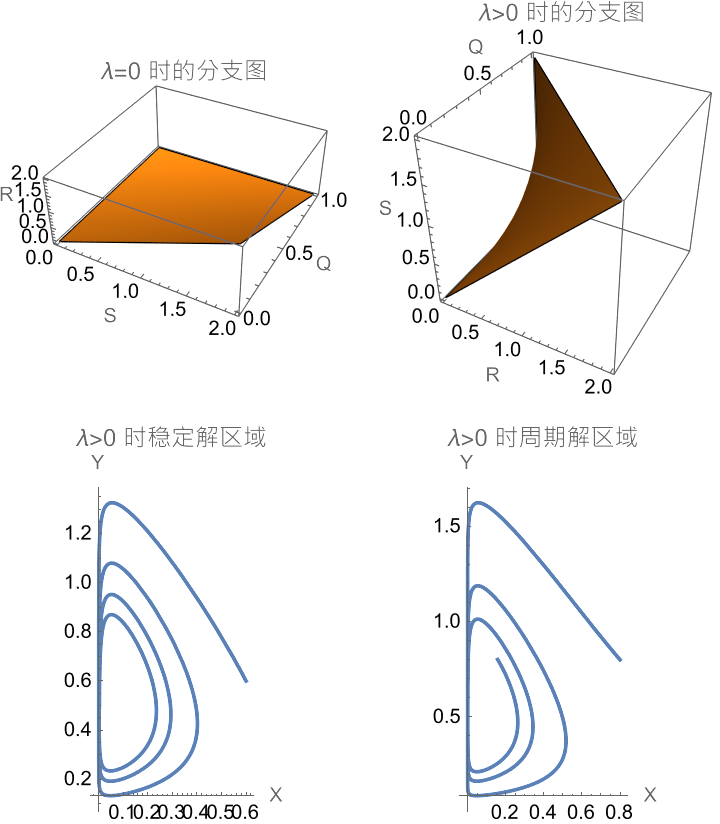

In [212]:
(* 设置参数 *)
m = 2;
n = 1;
p = 0.1;
q = 0.01;

(* 绘制 λ=0 时的分支图 *)
linearBranchPlot = Plot3D[S (1 - Q), {S, 0, 2}, {Q, 0, 1},
                          AxesLabel -> {"S", "Q", "R"}, PlotRange -> All, 
                          Mesh -> None, 
                          PlotLabel -> "λ=0 时的分支图"];

(* 定义迹为0时的条件 *)
λ = 0.01;

(* 计算迹为0时的分支图 *)
perturbedBranchPlot = ContourPlot3D[R == S (1 - Q) + λ, {R, 0, 2}, {Q, 0, 1}, {S, 0, 2},
                                    AxesLabel -> {"R", "Q", "S"}, PlotRange -> All, 
                                    Mesh -> None, 
                                    PlotLabel -> "λ>0 时的分支图"];

(* 定义无量纲化模型方程 *)
stableModel = {X'[t] == X[t] (1 - X[t]) - (m X[t] Y[t]) / (1 + n X[t]) + λ X[t],
               Y'[t] == (m X[t] Y[t]) / (1 + n X[t]) - p Y[t] - q Y[t]^2 + λ Y[t]};

(* 数值模拟稳定解 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};
stableSolution = NDSolve[{stableModel, stableInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制稳定解区域图 *)
stablePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100}, 
                            AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                            PlotLabel -> "λ>0 时稳定解区域"];

(* 数值模拟周期解 *)
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};
periodicSolution = NDSolve[{stableModel, periodicInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制周期解区域图 *)
periodicPlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. periodicSolution], {t, 0, 100}, 
                              AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                              PlotLabel -> "λ>0 时周期解区域"];

(* 显示所有图像 *)
GraphicsGrid[{{linearBranchPlot, perturbedBranchPlot}, {stablePlot, periodicPlot}}]


-Graphics-
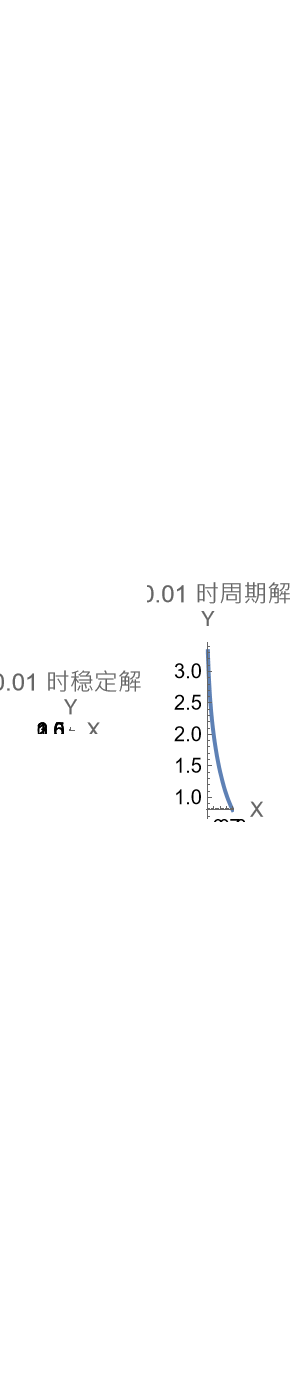

In [237]:
(* 设置参数 *)
R = 1.5;
S = 1;
Q = 0.1;

(* 定义无量纲化模型方程 *)
λ = 0.01;
stableModel = {X'[t] == R (1 - X[t]/S^2) X[t] - S X[t] Y[t]/(X[t] + Y[t]),
               Y'[t] == -Q Y[t] + X[t] Y[t]/(X[t] + Y[t]) - λ Y[t]^2/(X[t] + Y[t])};

(* 数值模拟稳定解 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};
stableSolution = NDSolve[{stableModel, stableInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制稳定解区域图 *)
stablePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100}, 
                            AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                            PlotLabel -> "λ = 0.01 时稳定解区域"];

(* 数值模拟周期解 *)
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};
periodicSolution = NDSolve[{stableModel, periodicInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制周期解区域图 *)
periodicPlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. periodicSolution], {t, 0, 100}, 
                              AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                              PlotLabel -> "λ = 0.01 时周期解区域"];

(* 显示所有图像 *)
GraphicsGrid[{{stablePlot, periodicPlot}}]


Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

\:5e73\:8861\:70b9: {{X -> 0.405941, Y -> 3.32133}, {X -> 1., Y -> 0.}}
\:7279\:5f81\:503c: {{-0.487433, -0.122448}, {-1.5, 0.9}}
\:7279\:5f81\:503c\:ff08\:7b80\:5316\:540e\:ff09: 
 
>   {{-0.487433, -0.122448}, {-1.5, 0.9}}


{{X -> 0.405941, Y -> 3.32133}, {X -> 1., Y -> 0.}}
{{-0.487433, -0.122448}, {-1.5, 0.9}}
{{-0.487433, -0.122448}, {-1.5, 0.9}}
-Graphics-
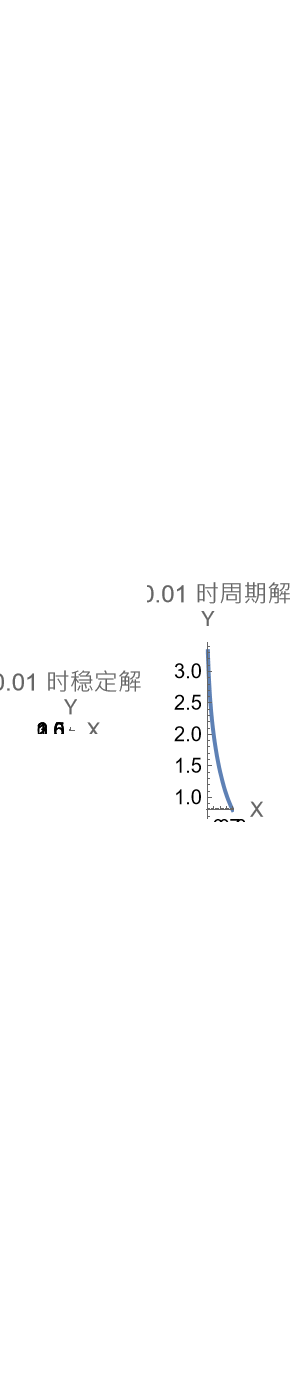

In [256]:
(* 设置参数 *)
R = 1.5;
S = 1;
Q = 0.1;
λ = 0.01;

(* 定义无量纲化模型方程 *)
eq1 = R (1 - X/S^2) X - S X Y/(X + Y) == 0;
eq2 = -Q Y + X Y/(X + Y) - λ Y^2/(X + Y) == 0;

(* 求解平衡点 *)
sol = Solve[{eq1, eq2}, {X, Y}]
Print["平衡点: ", sol];

(* 计算Jacobian矩阵 *)
jacobian = D[{R (1 - X/S^2) X - S X Y/(X + Y), -Q Y + X Y/(X + Y) - λ Y^2/(X + Y)}, {{X, Y}}];

(* 在每个平衡点处求解特征值 *)
eigenvalues = Table[Eigenvalues[jacobian /. sol[[i]]], {i, 1, Length[sol]}]
Print["特征值: ", eigenvalues];

(* 简化特征值 *)
eigenvaluesSimplified = Table[Simplify[eigenvalues[[i]], Assumptions -> {λ >= 0}], {i, 1, Length[eigenvalues]}]
Print["特征值（简化后）: ", eigenvaluesSimplified];

(* 定义无量纲化模型方程用于数值模拟 *)
stableModel = {X'[t] == R (1 - X[t]/S^2) X[t] - S X[t] Y[t]/(X[t] + Y[t]),
               Y'[t] == -Q Y[t] + X[t] Y[t]/(X[t] + Y[t]) - λ Y[t]^2/(X[t] + Y[t])};

(* 数值模拟稳定解 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};
stableSolution = NDSolve[{stableModel, stableInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制稳定解区域图 *)
stablePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100}, 
                            AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                            PlotLabel -> "λ = 0.01 时稳定解区域"];

(* 数值模拟周期解 *)
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};
periodicSolution = NDSolve[{stableModel, periodicInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制周期解区域图 *)
periodicPlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. periodicSolution], {t, 0, 100}, 
                              AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                              PlotLabel -> "λ = 0.01 时周期解区域"];

(* 显示所有图像 *)
GraphicsGrid[{{stablePlot, periodicPlot}}]


{Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], AbsoluteThickness[2], 
 
>        RGBColor[0, 0, 1]], Directive[Opacity[1.], AbsoluteThickness[2], 
 
>        RGBColor[1, 0, 0]]}, {X(t) - Prey, Y(t) - Predator}, LegendMarkers -> None, 
 
>      LabelStyle -> {}, LegendLayout -> Column], After, Identity]], -Graphics-}
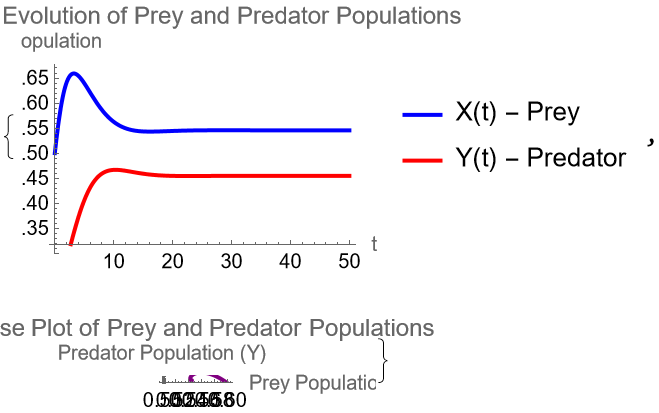

In [303]:
(* 定义参数 *)
R = 1.0;
S = 1.0;
Q = 0.5;
\[Lambda] = 0.1;

(* 定义捕食者-食饵模型的方程组 *)
model = {
   X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t])/(X[t] + Y[t]),
   Y'[t] == -Q Y[t] + (X[t] Y[t])/(X[t] + Y[t]) - (\[Lambda] Y[t]^2)/(X[t] + Y[t])
   };

(* 初始条件 *)
initialConditions = {X[0] == 0.5, Y[0] == 0.2};

(* 求解方程组 *)
sol = NDSolve[{model, initialConditions}, {X, Y}, {t, 0, 50}];

(* 绘制时间演化图 *)
timeEvolutionPlot = Plot[
   Evaluate[{X[t], Y[t]} /. sol],
   {t, 0, 50},
   PlotLegends -> {"X(t) - Prey", "Y(t) - Predator"},
   PlotLabel -> "Time Evolution of Prey and Predator Populations",
   AxesLabel -> {"t", "Population"},
   PlotStyle -> {Blue, Red}
   ];

(* 绘制相图 *)
phasePlot = ParametricPlot[
   Evaluate[{X[t], Y[t]} /. sol],
   {t, 0, 50},
   PlotLabel -> "Phase Plot of Prey and Predator Populations",
   AxesLabel -> {"Prey Population (X)", "Predator Population (Y)"},
   PlotStyle -> {Purple}
   ];

(* 显示图像 *)
{timeEvolutionPlot, phasePlot}


-Graphics-
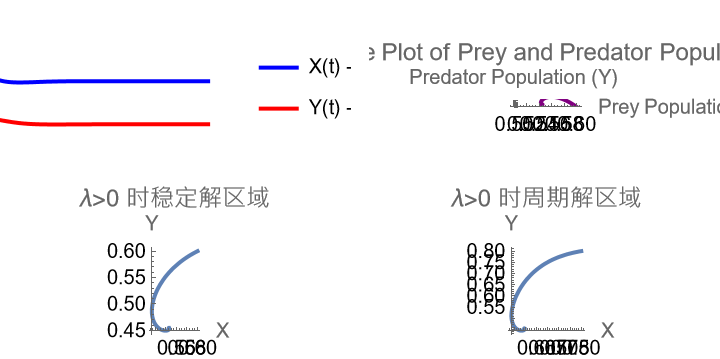

In [320]:
(* 设置参数 *)
R = 1.0;
S = 1.0;
Q = 0.5;
\[Lambda] = 0.1;

(* 定义捕食者-食饵模型的方程组 *)
model = {
   X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t])/(X[t] + Y[t]),
   Y'[t] == -Q Y[t] + (X[t] Y[t])/(X[t] + Y[t]) - (\[Lambda] Y[t]^2)/(X[t] + Y[t])
};

(* 初始条件 *)
initialConditions = {X[0] == 0.5, Y[0] == 0.2};

(* 求解方程组 *)
sol = NDSolve[{model, initialConditions}, {X, Y}, {t, 0, 50}];

(* 绘制时间演化图 *)
timeEvolutionPlot = Plot[
   Evaluate[{X[t], Y[t]} /. sol],
   {t, 0, 50},
   PlotLegends -> {"X(t) - Prey", "Y(t) - Predator"},
   PlotLabel -> "Time Evolution of Prey and Predator Populations",
   AxesLabel -> {"t", "Population"},
   PlotStyle -> {Blue, Red}
];

(* 绘制相图 *)
phasePlot = ParametricPlot[
   Evaluate[{X[t], Y[t]} /. sol],
   {t, 0, 50},
   PlotLabel -> "Phase Plot of Prey and Predator Populations",
   AxesLabel -> {"Prey Population (X)", "Predator Population (Y)"},
   PlotStyle -> {Purple}
];

(* 数值模拟稳定解 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};
stableSolution = NDSolve[
  {model, stableInitialConditions}, {X, Y}, {t, 0, 100}
];

(* 绘制稳定解区域图 *)
stablePlot = ParametricPlot[
  Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100},
  AxesLabel -> {"X", "Y"},
  PlotRange -> All,
  PlotStyle -> Thick,
  PlotLabel -> "λ>0 时稳定解区域"
];

(* 数值模拟周期解 *)
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};
periodicSolution = NDSolve[
  {model, periodicInitialConditions}, {X, Y}, {t, 0, 100}
];

(* 绘制周期解区域图 *)
periodicPlot = ParametricPlot[
  Evaluate[{X[t], Y[t]} /. periodicSolution], {t, 0, 100},
  AxesLabel -> {"X", "Y"},
  PlotRange -> All,
  PlotStyle -> Thick,
  PlotLabel -> "λ>0 时周期解区域"
];

(* 显示所有图像 *)
GraphicsGrid[{
  {timeEvolutionPlot, phasePlot},
  {stablePlot, periodicPlot}
}]


-Graphics-
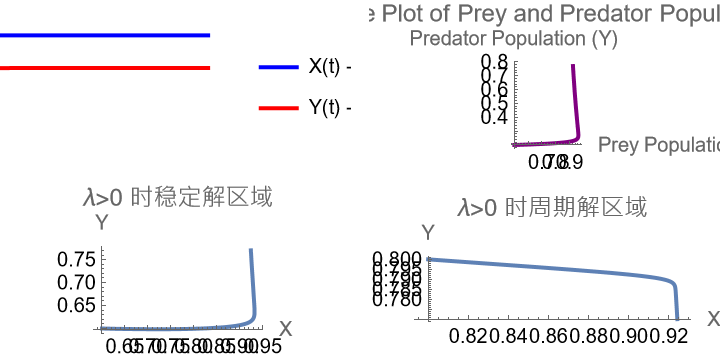

In [620]:
(* 设置参数 *)
R = 6.0;
S = 1.0;
Q = 0.5;
\[Lambda] = 0.1;

(* 定义捕食者-食饵模型的方程组 *)
model = {
   X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t])/(X[t] + Y[t]),
   Y'[t] == -Q Y[t] + (X[t] Y[t])/(X[t] + Y[t]) - (\[Lambda] Y[t]^2)/(X[t] + Y[t])
};

(* 初始条件 *)
initialConditions = {X[0] == 0.5, Y[0] == 0.2};

(* 求解方程组 *)
sol = NDSolve[{model, initialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制时间演化图 *)
timeEvolutionPlot = Plot[
   Evaluate[{X[t], Y[t]} /. sol],
   {t, 0, 100},
   PlotLegends -> {"X(t) - Prey", "Y(t) - Predator"},
   PlotLabel -> "Time Evolution of Prey and Predator Populations",
   AxesLabel -> {"t", "Population"},
   PlotStyle -> {Blue, Red},
   PlotRange -> All
];

(* 绘制相图 *)
phasePlot = ParametricPlot[
   Evaluate[{X[t], Y[t]} /. sol],
   {t, 0, 100},
   PlotLabel -> "Phase Plot of Prey and Predator Populations",
   AxesLabel -> {"Prey Population (X)", "Predator Population (Y)"},
   PlotRange -> All,
   PlotStyle -> {Purple}
];

(* 数值模拟稳定解 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};
stableSolution = NDSolve[
  {model, stableInitialConditions}, {X, Y}, {t, 0, 100}
];

(* 绘制稳定解区域图 *)
stablePlot = ParametricPlot[
  Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100},
  AxesLabel -> {"X", "Y"},
  PlotRange -> All,
  PlotStyle -> Thick,
  PlotLabel -> "λ>0 时稳定解区域"
];

(* 数值模拟周期解 *)
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};
periodicSolution = NDSolve[
  {model, periodicInitialConditions}, {X, Y}, {t, 0, 100}
];

(* 绘制周期解区域图 *)
periodicPlot = ParametricPlot[
  Evaluate[{X[t], Y[t]} /. periodicSolution], {t, 0, 100},
  AxesLabel -> {"X", "Y"},
  PlotRange -> All,
  PlotStyle -> Thick,
  PlotLabel -> "λ>0 时周期解区域"
];

(* 显示所有图像 *)
GraphicsGrid[{
  {timeEvolutionPlot, phasePlot},
  {stablePlot, periodicPlot}
}]


Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], AbsoluteThickness[2], 
 
>       RGBColor[0, 0, 1]], Directive[Opacity[1.], AbsoluteThickness[2], 
 
>       RGBColor[1, 0, 0]]}, {X(t) - 食饵, Y(t) - 捕食者}, LegendMarkers -> None, 
 
>     LabelStyle -> {}, LegendLayout -> Column], After, Identity]]
-Graphics-
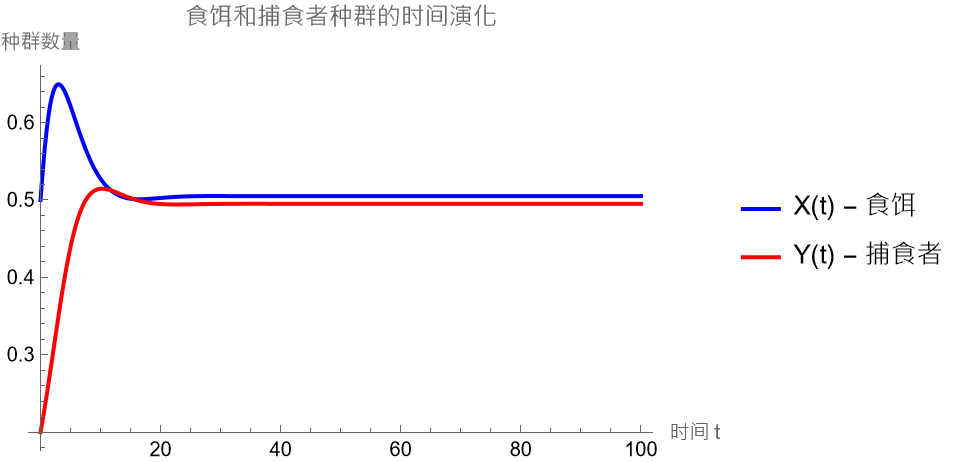
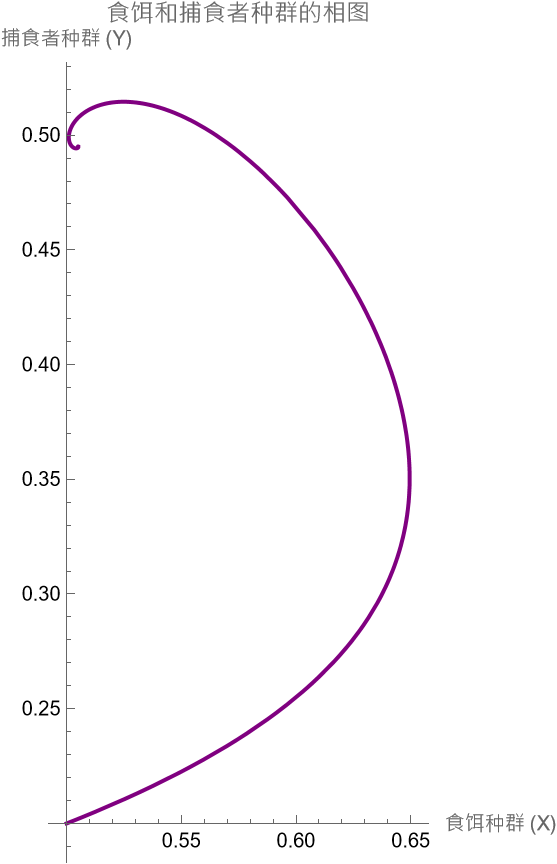

In [603]:
(* 设置参数 *)
R = 1.0;
S = 3.0;
Q = 0.5;
\[Lambda] = 0.01;

(* 定义捕食者-食饵模型的方程组 *)
model = {
   X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t])/(X[t] + Y[t]),
   Y'[t] == -Q Y[t] + (X[t] Y[t])/(X[t] + Y[t]) - (\[Lambda] Y[t]^2)/(X[t] + Y[t])
};

(* 初始条件 *)
initialConditions = {X[0] == 0.5, Y[0] == 0.2};

(* 求解方程组 *)
sol = NDSolve[{model, initialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制时间演化图 *)
timeEvolutionPlot = Plot[
   Evaluate[{X[t], Y[t]} /. sol],
   {t, 0, 100},
   PlotLegends -> {"X(t) - 食饵", "Y(t) - 捕食者"},
   PlotLabel -> "食饵和捕食者种群的时间演化",
   AxesLabel -> {"时间 t", "种群数量"},
   PlotStyle -> {Blue, Red},
   PlotRange -> All
];
timeEvolutionPlot

(* 绘制相图 *)
phasePlot = ParametricPlot[
   Evaluate[{X[t], Y[t]} /. sol],
   {t, 0, 100},
   PlotLabel -> "食饵和捕食者种群的相图",
   AxesLabel -> {"食饵种群 (X)", "捕食者种群 (Y)"},
   PlotRange -> All,
   PlotStyle -> {Purple}
];
phasePlot


-Graphics-
-Graphics-
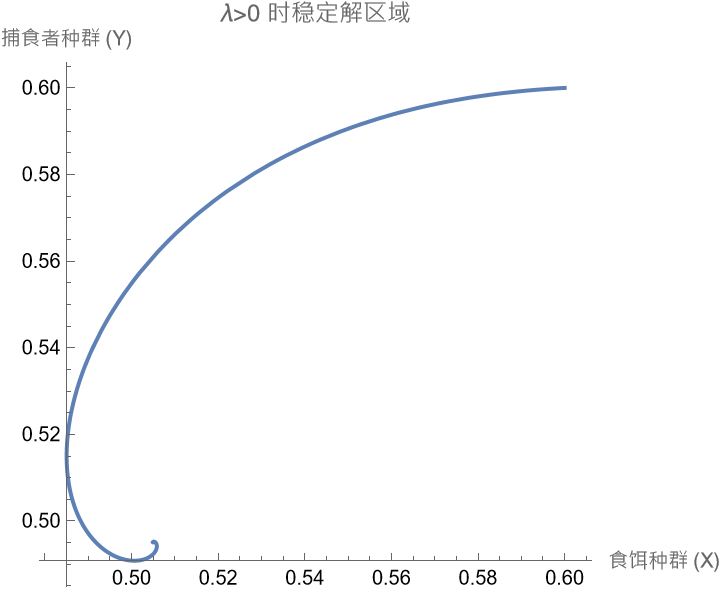
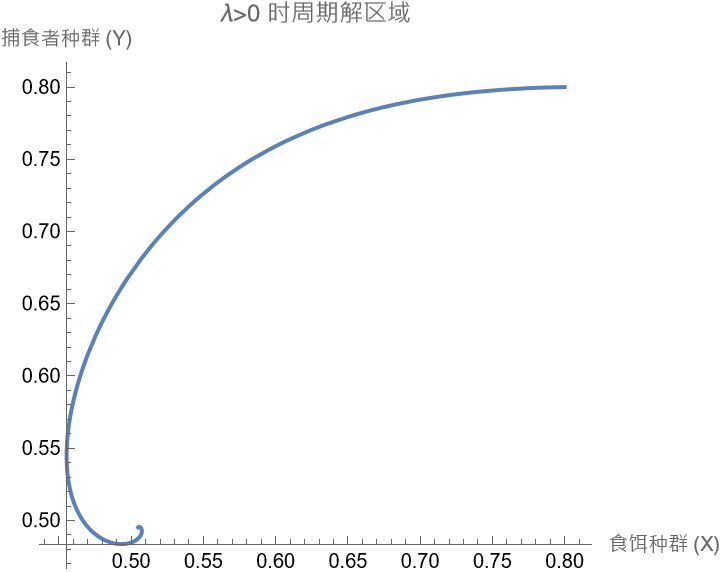

In [567]:
(* 设置参数 *)
R = 1.0;
S = 1.0;
Q = 0.5;
\[Lambda] = 0.01;

(* 定义捕食者-食饵模型的方程组 *)
model = {
   X'[t] == R (1 - X[t]/S^2) X[t] - (S X[t] Y[t])/(X[t] + Y[t]),
   Y'[t] == -Q Y[t] + (X[t] Y[t])/(X[t] + Y[t]) - (\[Lambda] Y[t]^2)/(X[t] + Y[t])
};

(* 数值模拟稳定解 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};
stableSolution = NDSolve[
  {model, stableInitialConditions}, {X, Y}, {t, 0, 100}
];

(* 绘制稳定解区域图 *)
stablePlot = ParametricPlot[
  Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100},
  AxesLabel -> {"食饵种群 (X)", "捕食者种群 (Y)"},
  PlotRange -> All,
  PlotStyle -> Thick,
  PlotLabel -> "λ>0 时稳定解区域"
];
stablePlot

(* 数值模拟周期解 *)
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};
periodicSolution = NDSolve[
  {model, periodicInitialConditions}, {X, Y}, {t, 0, 100}
];

(* 绘制周期解区域图 *)
periodicPlot = ParametricPlot[
  Evaluate[{X[t], Y[t]} /. periodicSolution], {t, 0, 100},
  AxesLabel -> {"食饵种群 (X)", "捕食者种群 (Y)"},
  PlotRange -> All,
  PlotStyle -> Thick,
  PlotLabel -> "λ>0 时周期解区域"
];
periodicPlot


-Graphics-
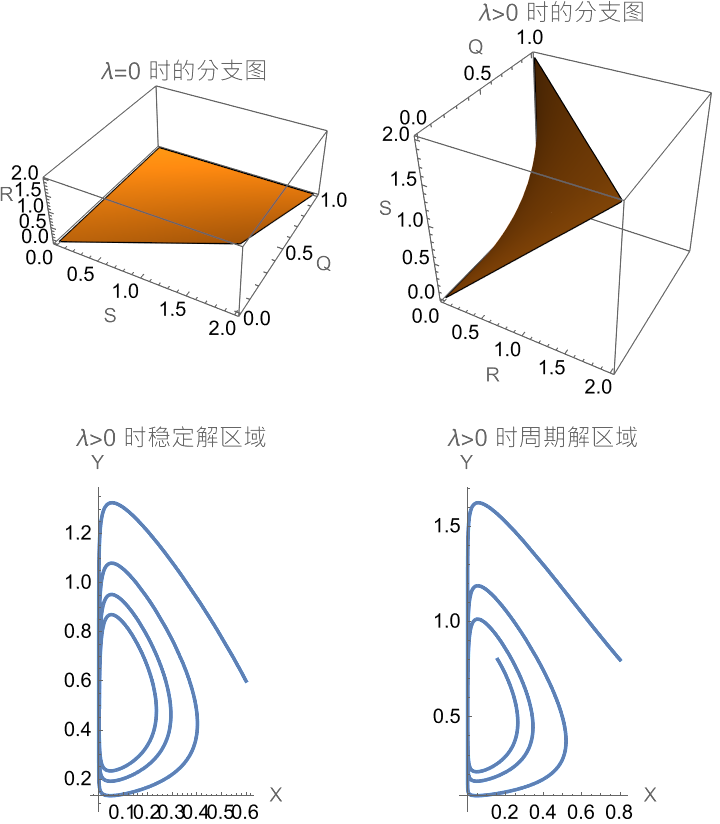

In [1]:
(* 设置参数 *)
m = 2;
n = 1;
p = 0.1;
q = 0.01;
lambda = 0.01;

(* 绘制 λ=0 时的分支图 *)
linearBranchPlot = Plot3D[S (1 - Q), {S, 0, 2}, {Q, 0, 1},
                          AxesLabel -> {"S", "Q", "R"}, PlotRange -> All, 
                          Mesh -> None, 
                          PlotLabel -> "λ=0 时的分支图"];

(* 计算迹为0时的分支图 *)
perturbedBranchPlot = ContourPlot3D[R == S (1 - Q) + lambda, {R, 0, 2}, {Q, 0, 1}, {S, 0, 2},
                                    AxesLabel -> {"R", "Q", "S"}, PlotRange -> All, 
                                    Mesh -> None, 
                                    PlotLabel -> "λ>0 时的分支图"];

(* 定义无量纲化模型方程 *)
stableModel = {X'[t] == X[t] (1 - X[t]) - (m X[t] Y[t]) / (1 + n X[t]) + lambda X[t],
               Y'[t] == (m X[t] Y[t]) / (1 + n X[t]) - p Y[t] - q Y[t]^2 + lambda Y[t]};

(* 数值模拟稳定解 *)
stableInitialConditions = {X[0] == 0.6, Y[0] == 0.6};
stableSolution = NDSolve[{stableModel, stableInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制稳定解区域图 *)
stablePlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. stableSolution], {t, 0, 100}, 
                            AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                            PlotLabel -> "λ>0 时稳定解区域"];

(* 数值模拟周期解 *)
periodicInitialConditions = {X[0] == 0.8, Y[0] == 0.8};
periodicSolution = NDSolve[{stableModel, periodicInitialConditions}, {X, Y}, {t, 0, 100}];

(* 绘制周期解区域图 *)
periodicPlot = ParametricPlot[Evaluate[{X[t], Y[t]} /. periodicSolution], {t, 0, 100}, 
                              AxesLabel -> {"X", "Y"}, PlotRange -> All, PlotStyle -> Thick,
                              PlotLabel -> "λ>0 时周期解区域"];

(* 显示所有图像 *)
GraphicsGrid[{{linearBranchPlot, perturbedBranchPlot}, {stablePlot, periodicPlot}}]
